    # Submitted By: 
        Moran Farraj  208155598
        Habeb Nawatha 208048579

# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from datetime import datetime
from sklearn.model_selection import cross_val_predict
from scipy.spatial import distance
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, r2_score ,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# Read Data

In [2]:
df = pd.read_csv('Human_Resuorces_Analytics.csv')

df

Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID   
0         Adinolfi, Wilson  K  10026          0                0         1  \
1    Ait Sidi, Karthikeyan     10084          1                1         1   
2           Akinkuolie, Sarah  10196          1                1         0   
3                Alagbe,Trina  10088          1                1         0   
4            Anderson, Carol   10069          0                2         0   
..                        ...    ...        ...              ...       ...   
306            Woodson, Jason  10135          0                0         1   
307        Ybarra, Catherine   10301          0                0         0   
308          Zamora, Jennifer  10010          0                0         0   
309               Zhou, Julia  10043          0                0         0   
310             Zima, Colleen  10271          0                4         0   

     EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...   
0              1       5            4                       0   62506  ...  \
1              5       3            3                       0  104437  ...   
2              5       5            3                       0   64955  ...   
3              1       5            3                       0   64991  ...   
4              5       5            3                       0   50825  ...   
..           ...     ...          ...                     ...     ...  ...   
306            1       5            3                       0   65893  ...   
307            5       5            1                       0   48513  ...   
308            1       3            4                       0  220450  ...   
309            1       3            3                       0   89292  ...   
310            1       5            3                       0   45046  ...   

        ManagerName  ManagerID  RecruitmentSource PerformanceScore   
0    Michael Albert       22.0           LinkedIn          Exceeds  \
1        Simon Roup        4.0             Indeed      Fully Meets   
2    Kissy Sullivan       20.0           LinkedIn      Fully Meets   
3      Elijiah Gray       16.0             Indeed      Fully Meets   
4    Webster Butler       39.0      Google Search      Fully Meets   
..              ...        ...                ...              ...   
306  Kissy Sullivan       20.0           LinkedIn      Fully Meets   
307  Brannon Miller       12.0      Google Search              PIP   
308      Janet King        2.0  Employee Referral          Exceeds   
309      Simon Roup        4.0  Employee Referral      Fully Meets   
310   David Stanley       14.0           LinkedIn      Fully Meets   

     EngagementSurvey EmpSatisfaction SpecialProjectsCount   
0                4.60               5                    0  \
1                4.96               3                    6   
2                3.02               3                    0   
3                4.84               5                    0   
4                5.00               4                    0   
..                ...             ...                  ...   
306              4.07               4                    0   
307              3.20               2                    0   
308              4.60               5                    6   
309              5.00               3                    5   
310              4.50               5                    0   

    LastPerformanceReview_Date DaysLateLast30 Absences  
0                    1/17/2019              0        1  
1                    2/24/2016              0       17  
2                    5/15/2012              0        3  
3                     1/3/2019              0       15  
4                     2/1/2016              0        2  
..                         ...            ...      ...  
306                  2/28/2019              0       13  
307                   9/2/2015              5        4  
308                  2/21/2019             

In [3]:
# save the names in another df - for section B
df_names = df[['Employee_Name', 'EmpID']].copy()

# Section A: Data Exploration and Pre-processing

## EDA

In [4]:
race_counts = df['RaceDesc'].value_counts()
gender_counts = df['Sex'].value_counts()
citizenship_counts = df['CitizenDesc'].value_counts()

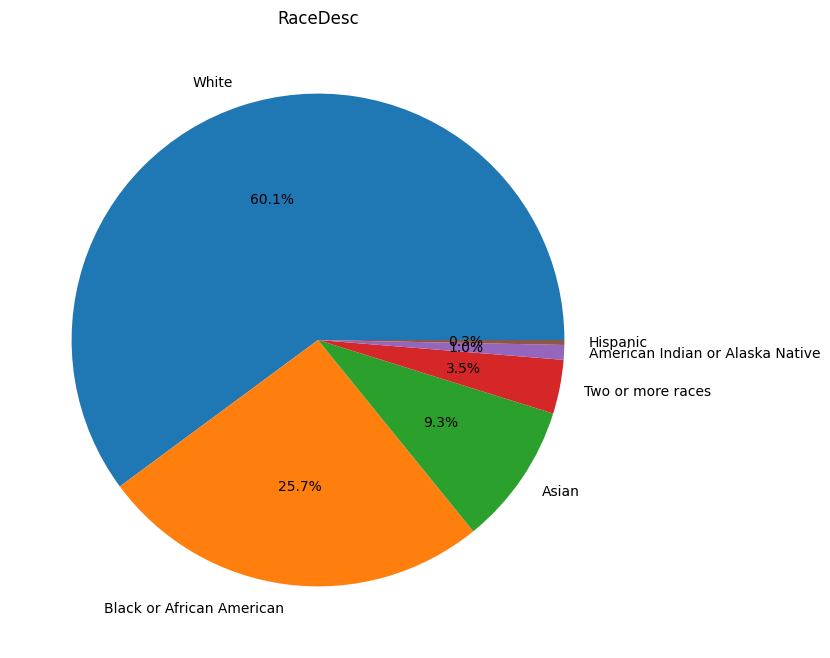

In [5]:
# pie plot for the RaceDesc
plt.figure(figsize=(20, 8))
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%')
plt.title('RaceDesc')
plt.show()

    Employee Race Distribution: The majority of employees in the organization are White, followed by Black or African American. The number of employees belonging to other racial groups, such as Asian, Two or more races, and American Indian or Alaska Native, are considerably smaller.

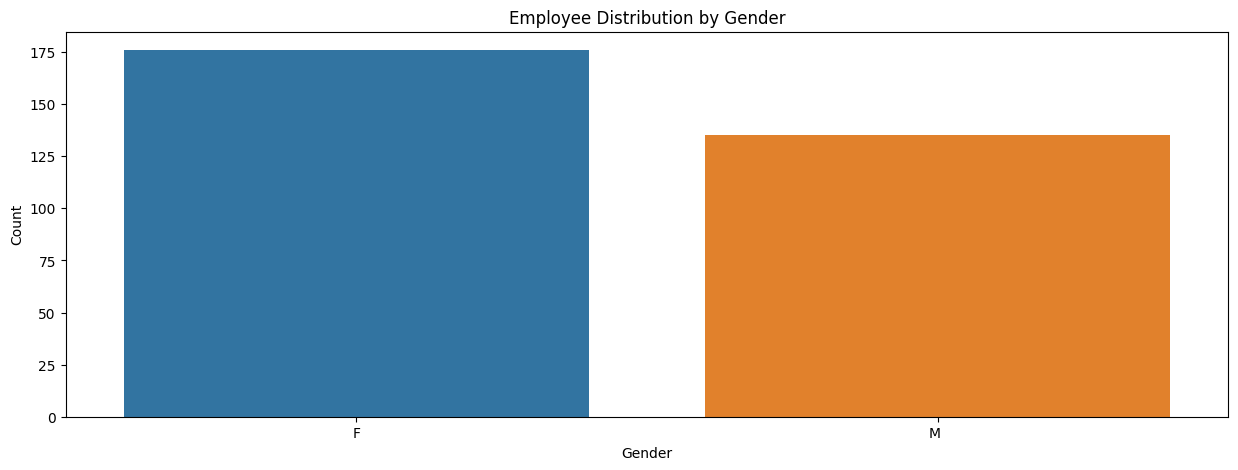

In [6]:
fig, ax = plt.subplots(figsize=(15, 5))

# Gender counts
sns.barplot(x=gender_counts.index, y=gender_counts.values, ax=ax)
ax.set_title('Employee Distribution by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
plt.show()

### <span style="color:lightblue"> What is the overall diversity profile of the organization? </span>
    Employee Gender Distribution: The organization has slightly more employees identified as "1" (which could be either Male or Female, as the data does not specify) than "0". For a more accurate understanding, we would need to know which GenderID corresponds to which gender.

<Axes: xlabel='RaceDesc', ylabel='count'>

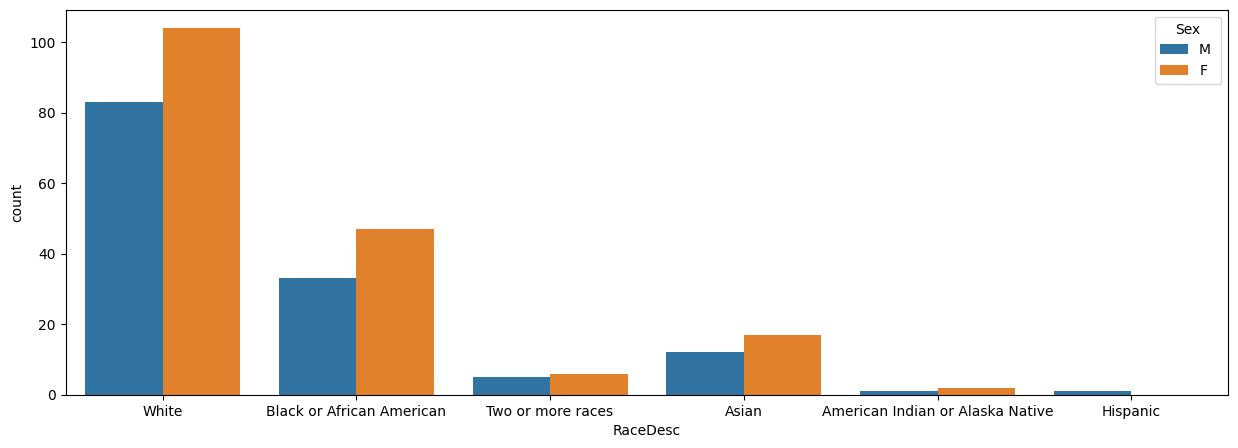

In [7]:
# countplot for the sex and race
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(df, x ='RaceDesc', hue='Sex', ax=ax)

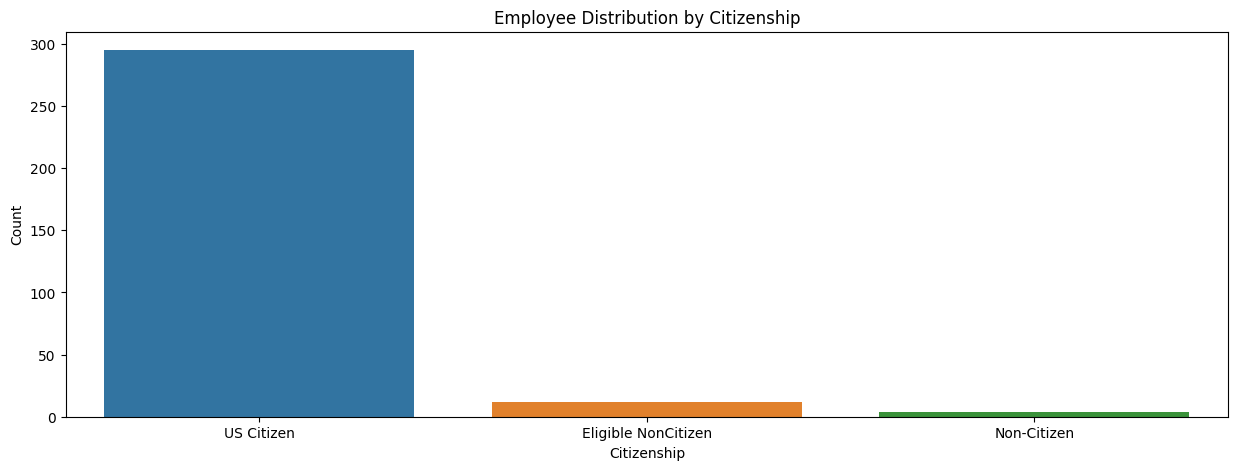

In [8]:
fig, ax = plt.subplots(figsize=(15, 5))

# Citizenship counts
sns.barplot(x=citizenship_counts.index, y=citizenship_counts.values, ax=ax)
ax.set_title('Employee Distribution by Citizenship')
ax.set_xlabel('Citizenship')
ax.set_ylabel('Count')
plt.show()


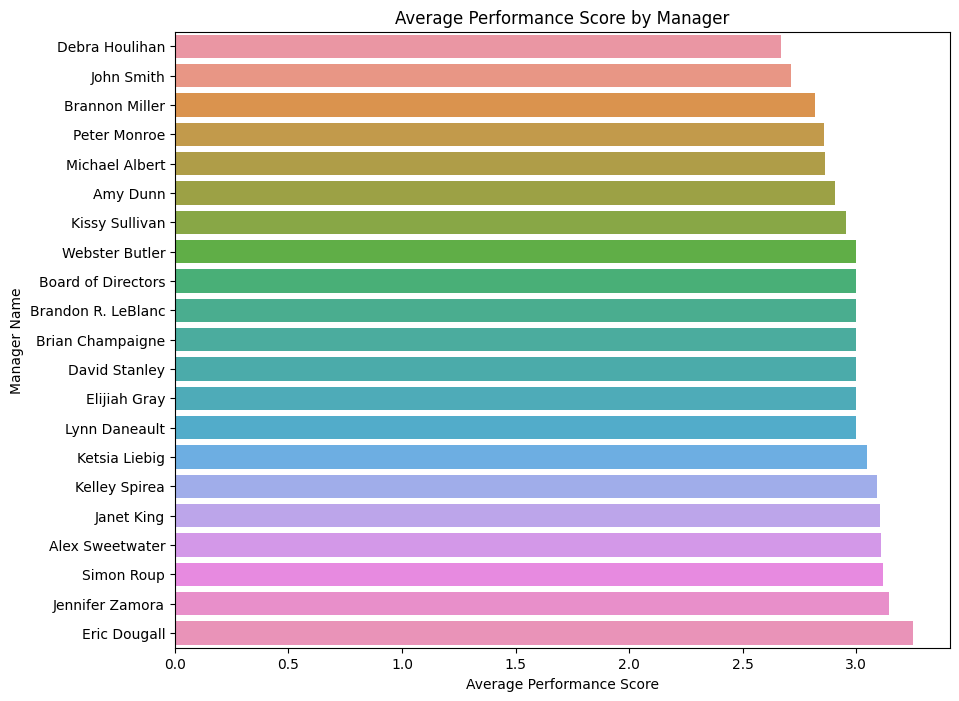

In [9]:
# Group by Manager and calculate mean performance score
manager_performance = df.groupby('ManagerName')['PerfScoreID'].mean().sort_values()

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x=manager_performance.values, y=manager_performance.index, orient='h')
plt.title('Average Performance Score by Manager')
plt.xlabel('Average Performance Score')
plt.ylabel('Manager Name')
plt.show()

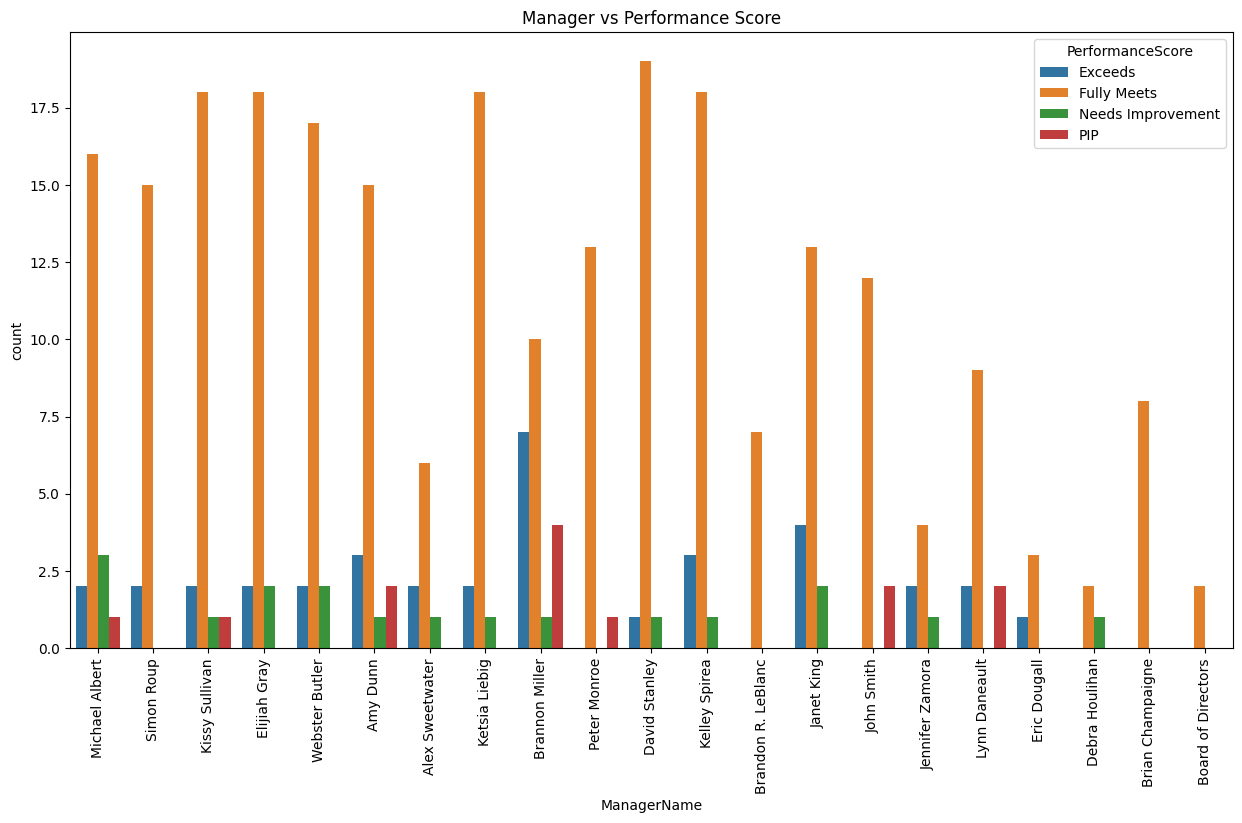

In [10]:
plt.figure(figsize=(15, 8))
sns.countplot(x='ManagerName', hue='PerformanceScore', data=df)
plt.xticks(rotation=90)
plt.title("Manager vs Performance Score")
plt.show()

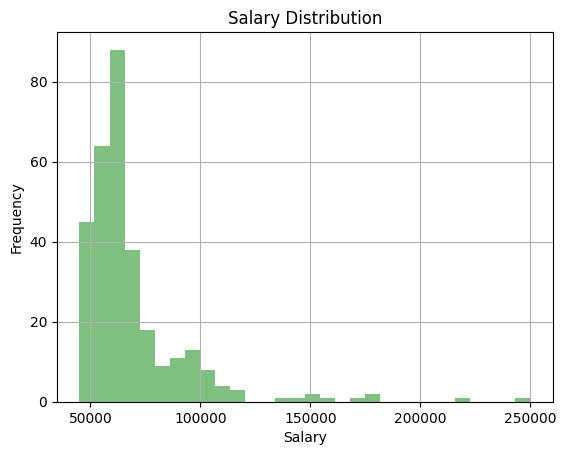

In [11]:
# Create a histogram for the 'Salary' column
plt.hist(df['Salary'], bins=30, alpha=0.5, color='g')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

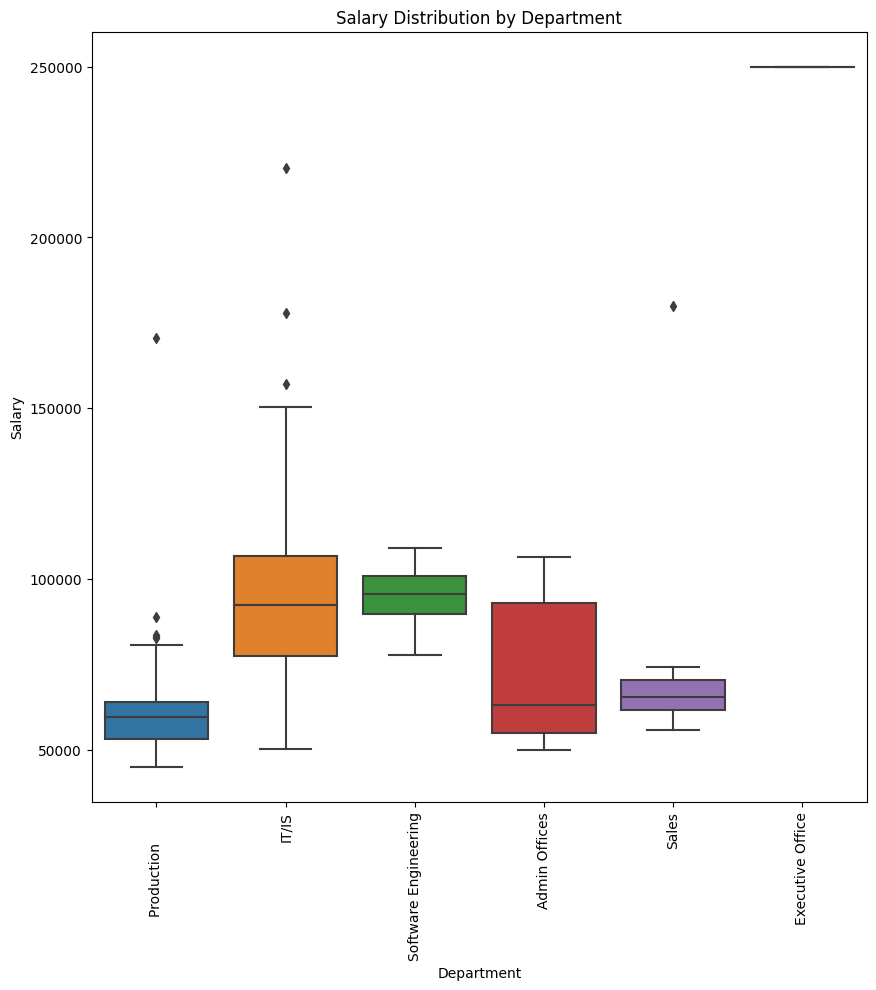

In [12]:
# Create a box plot for the 'Salary' column categorized by 'Department'
plt.figure(figsize=(10, 10))
sns.boxplot(x='Department', y='Salary', data=df)
plt.title('Salary Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

 ### <span style="color:lightblue"> Are there areas of the company where pay is not equitable? </span>
    
    The boxplot shows the distribution of salaries across different departments in the organization. Each box represents the interquartile range (25th percentile to 75th percentile) of salaries, with the line in the middle of the box indicating the median salary. Outliers, if any, are represented by individual points outside the whiskers of the box.

    The salary distributions vary considerably among different departments. Some departments have a wider spread of salaries, while others have a narrower range. Also, the median salary varies among departments, indicating that there might be some inequity in pay across different areas of the company. However, it's also crucial to consider that these differences might be due to variations in roles, experience levels, and other factors within these departments. For a more comprehensive analysis of pay equity, additional information about employee roles and experience levels would be helpful.

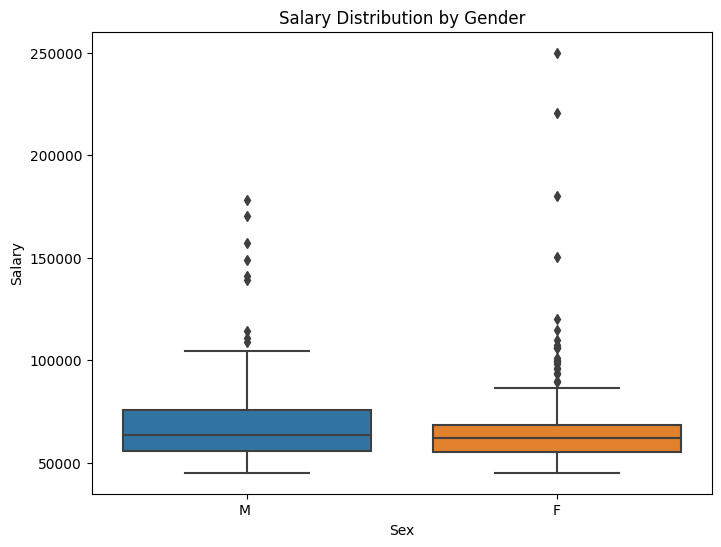

In [13]:
# Create a boxplot for the 'Salary' column categorized by 'GenderID'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Salary', data=df)
plt.title('Salary Distribution by Gender')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

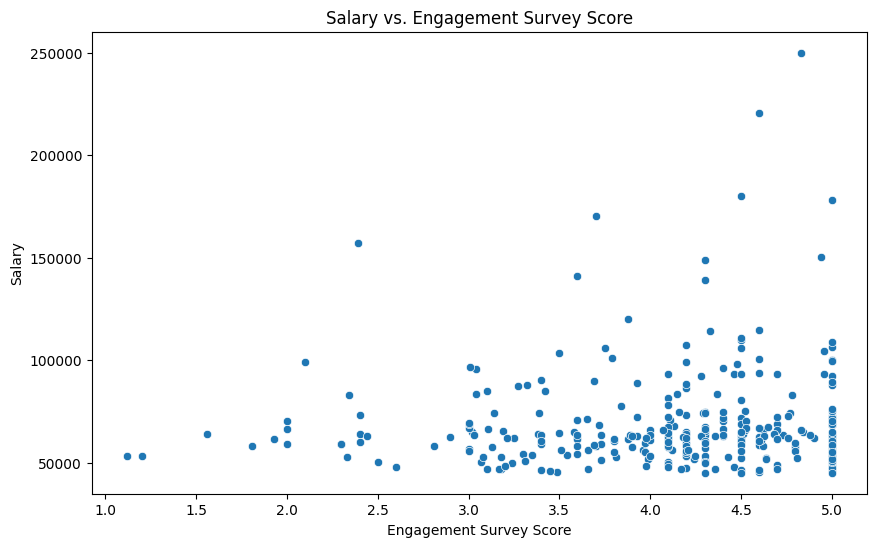

In [14]:
# Create a scatter plot for 'Salary' and 'EngagementSurvey' columns to see if there's any correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='EngagementSurvey', y='Salary', data=df)
plt.title('Salary vs. Engagement Survey Score')
plt.xlabel('Engagement Survey Score')
plt.ylabel('Salary')
plt.show()

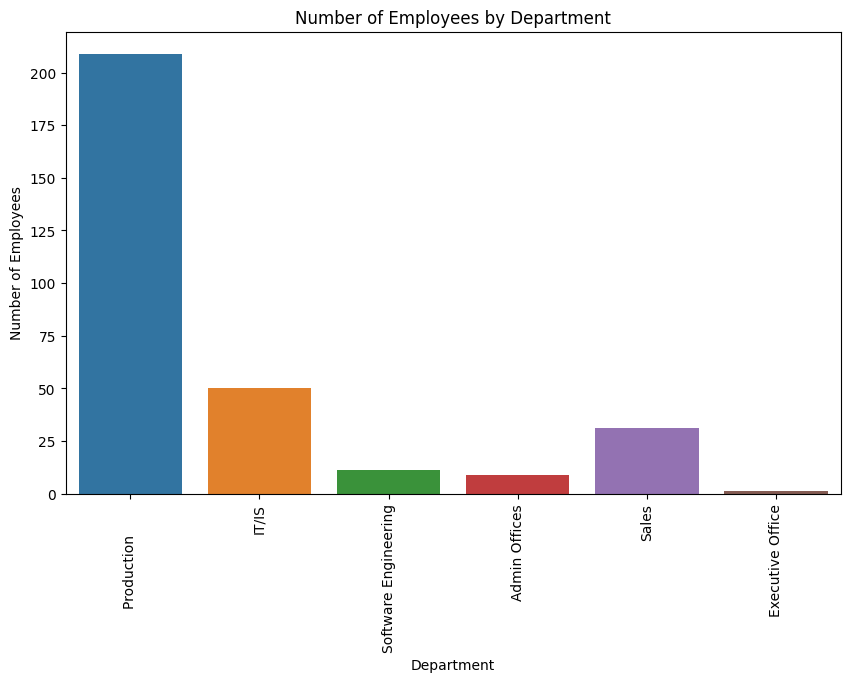

In [15]:
# Create a bar plot for the 'Department' column to see the number of employees in each department
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', data=df)
plt.title('Number of Employees by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=90)
plt.show()

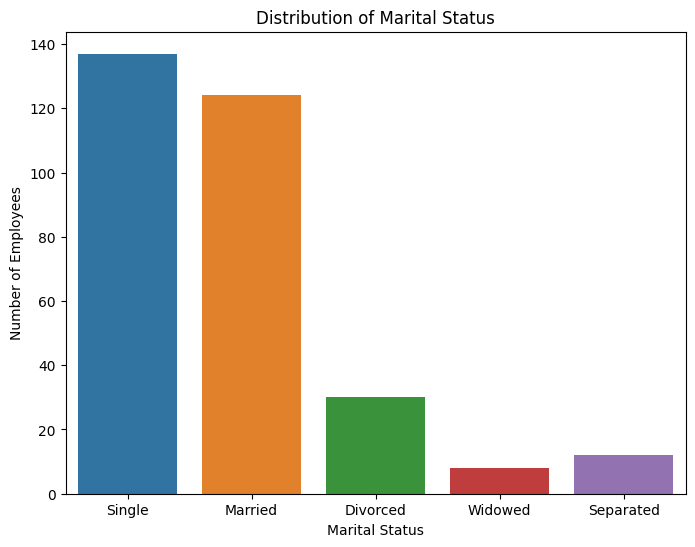

In [16]:
# Create a bar plot for the 'MaritalStatusID' column to see the distribution of marital status
plt.figure(figsize=(8, 6))
sns.countplot(x='MaritalDesc', data=df)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Employees')
plt.show()

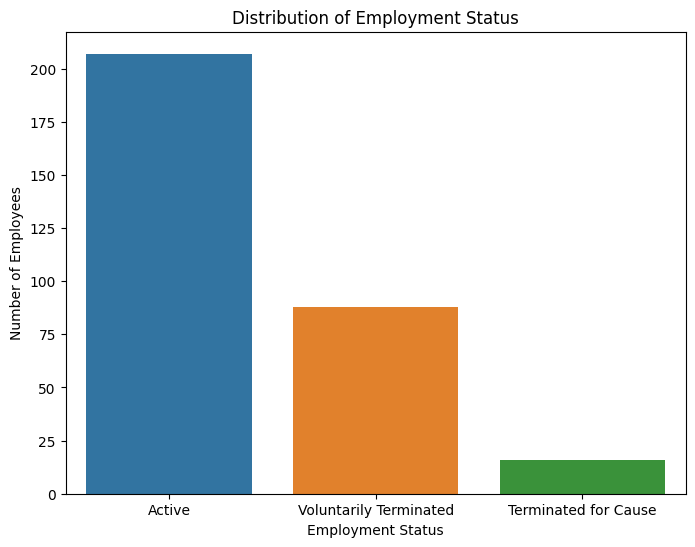

In [17]:
# Create a bar plot for the 'EmpStatusID' column to see the distribution of employment status
plt.figure(figsize=(8, 6))
sns.countplot(x='EmploymentStatus', data=df)
plt.title('Distribution of Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Number of Employees')
plt.show()

### I think we can delete it. down

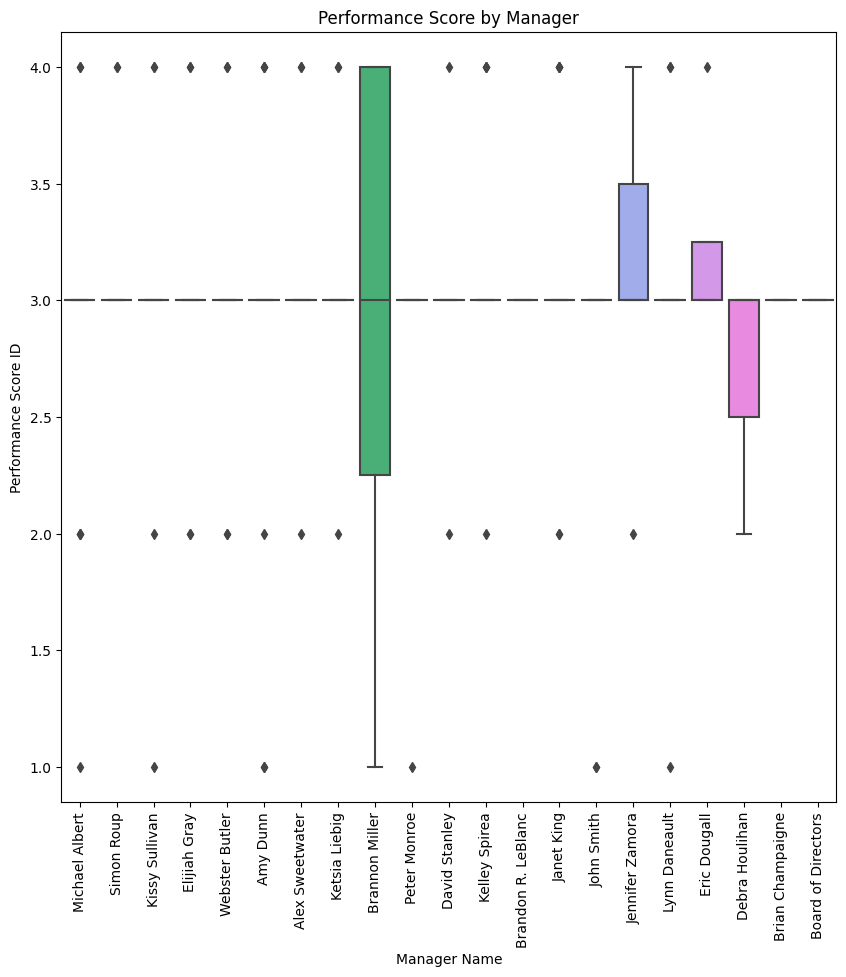

In [18]:
# Create a box plot for the 'PerfScoreID' column categorized by 'ManagerName'
plt.figure(figsize=(10, 10))
sns.boxplot(x='ManagerName', y='PerfScoreID', data=df)
plt.title('Performance Score by Manager')
plt.xlabel('Manager Name')
plt.ylabel('Performance Score ID')
plt.xticks(rotation=90)
plt.show()

### <span style="color:lightblue"> Is there any relationship between who a person works for and their performance score? </span>
    The boxplot provides a visualization of the performance scores of employees under different managers. Each box represents the interquartile range (25th percentile to 75th percentile) of performance scores, with the line in the middle of the box indicating the median. Outliers, if any, are represented by individual points outside the whiskers of the box.

    The performance scores seem to vary across different managers. Some managers have a wider spread of performance scores among their subordinates, while others have a narrower range. This suggests that there may be some relationship between who an employee works for and their performance score. However, it's important to note that this doesn't necessarily imply causation, as other factors not included in this dataset may influence an employee's performance.

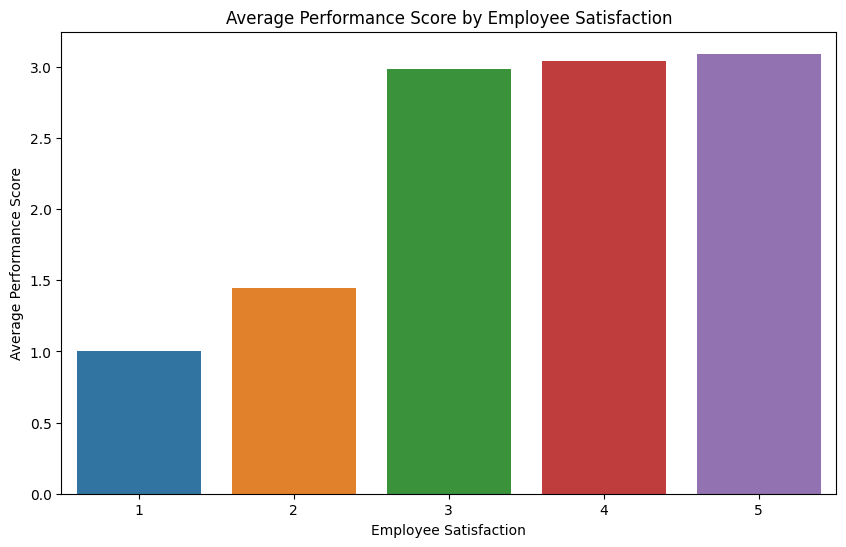

In [19]:
# Group by EmpSatisfaction and calculate mean performance score
satisfaction_performance = df.groupby('EmpSatisfaction')['PerfScoreID'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=satisfaction_performance.index, y=satisfaction_performance.values)
plt.title('Average Performance Score by Employee Satisfaction')
plt.xlabel('Employee Satisfaction')
plt.ylabel('Average Performance Score')
plt.show()


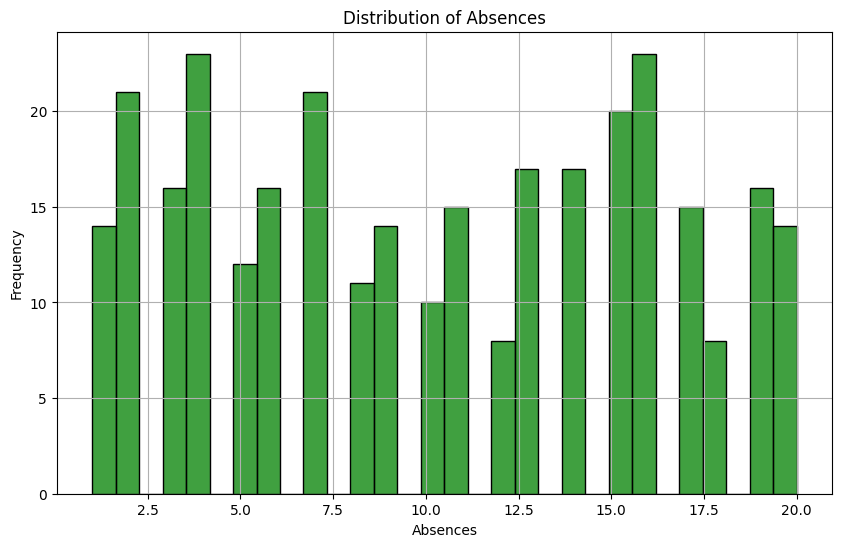

In [20]:
# Next, let's visualize the distribution of absences
plt.figure(figsize=(10, 6))
sns.histplot(df['Absences'], bins=30, color='g')
plt.title('Distribution of Absences')
plt.xlabel('Absences')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

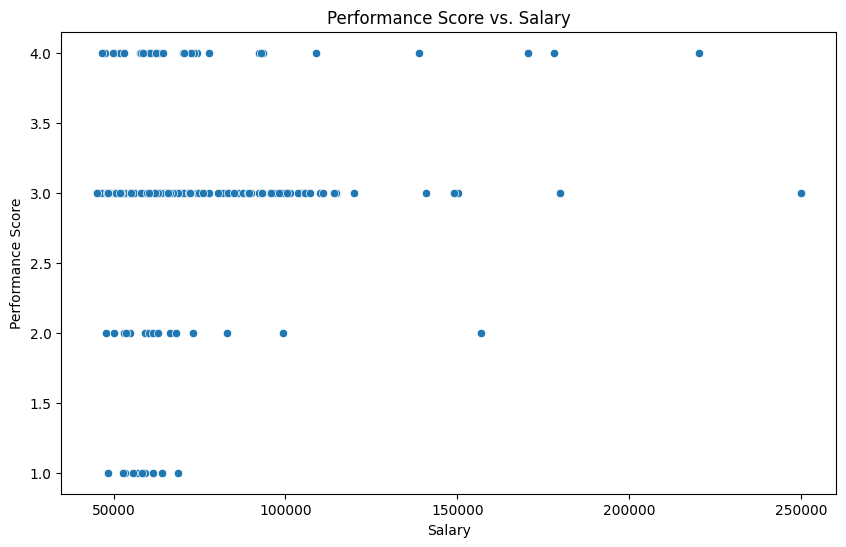

In [21]:
# Performance and salary distribution
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Salary', y='PerfScoreID', data=df)
plt.title('Performance Score vs. Salary')
plt.xlabel('Salary')
plt.ylabel('Performance Score')
plt.show()


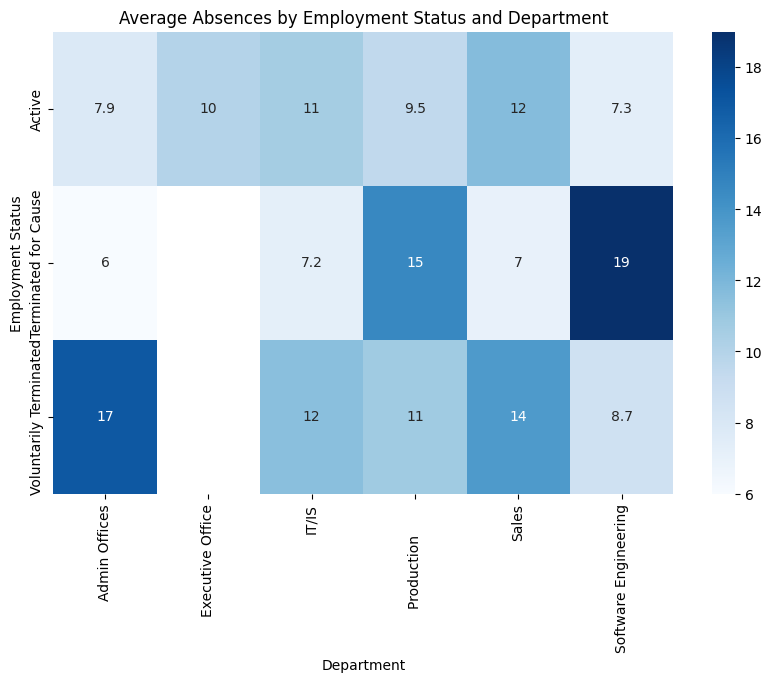

In [22]:
# Heatmap for employment status and department by absences
plt.figure(figsize=(10, 6))
sns.heatmap(df.groupby(['EmploymentStatus', 'Department'])['Absences'].mean().unstack(), annot=True, cmap='Blues')
plt.title('Average Absences by Employment Status and Department')
plt.xlabel('Department')
plt.ylabel('Employment Status')
plt.show()

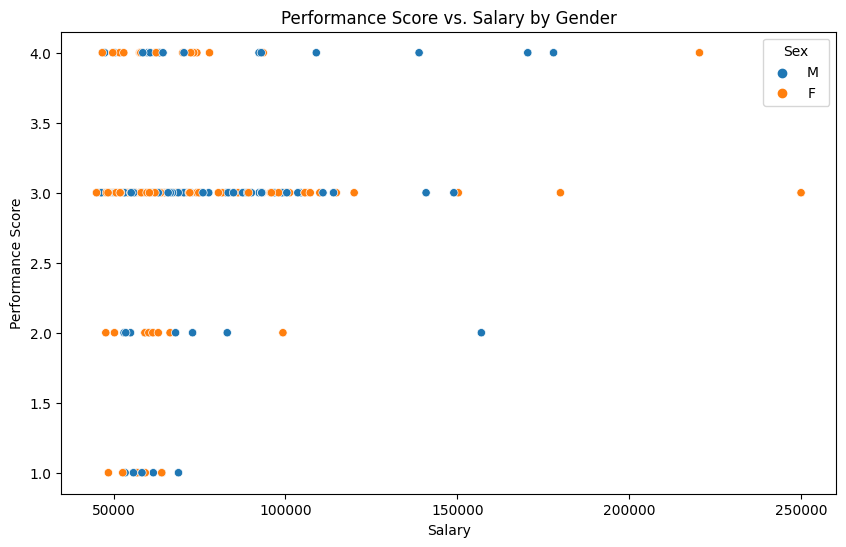

In [23]:
# Plot for Salary and gender and race
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Salary', y='PerfScoreID', hue='Sex', data=df)
plt.title('Performance Score vs. Salary by Gender')
plt.xlabel('Salary')
plt.ylabel('Performance Score')
plt.show()


## Data Pre-processing

In [24]:
df['EmploymentStatus'].unique()

array(['Active', 'Voluntarily Terminated', 'Terminated for Cause'],
      dtype=object)

In [25]:
df['EmpStatusID'].unique()

array([1, 5, 3, 4, 2])

In [26]:
# print the observations that has the EmpStatusID is 5 print the EmploymentStatus
print(df[df['EmpStatusID'] == 1]['EmploymentStatus'].unique())
print(df[df['EmpStatusID'] == 2]['EmploymentStatus'].unique())
print(df[df['EmpStatusID'] == 3]['EmploymentStatus'].unique())
print(df[df['EmpStatusID'] == 4]['EmploymentStatus'].unique())
print(df[df['EmpStatusID'] == 5]['EmploymentStatus'].unique())

['Active' 'Terminated for Cause']
['Active']
['Active']
['Terminated for Cause']
['Voluntarily Terminated']


After Exploration we decided to drop the EmpStatusID because the target value is EmploymentStatus

In [27]:
# label encoding for the EmploymentStatus all values
df['EmploymentStatus'] = df['EmploymentStatus'].map({'Active': 1, 'Voluntarily Terminated': 2, 'Terminated for Cause': 3})

In [28]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(col, df[col].isnull().sum())

DateofTermination 207
ManagerID 8


In [29]:
# calculate percentage of null values in each column
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(col, df[col].isnull().sum() / df.shape[0])

DateofTermination 0.6655948553054662
ManagerID 0.02572347266881029


In [30]:
# check the value of the observations that has date of termination null in the columns Termd
df[df['DateofTermination'].isnull()]['Termd'].unique()

array([0])

In [31]:
#fill with ffill method
df['DateofTermination'].fillna(method='ffill', inplace=True)

#drop ManagerId null values
df.dropna(subset=['ManagerID'], inplace=True)

In [32]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(col, df[col].isnull().sum())

DateofTermination 1


In [33]:
# drop null observations
df.dropna(inplace=True)

In [34]:
df.shape  

(302, 36)

In [35]:
#check duplicates
df.duplicated().sum()

0

In [36]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Employee_Name', 'Position', 'State', 'DOB', 'Sex', 'MaritalDesc',
       'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire',
       'DateofTermination', 'TermReason', 'Department', 'ManagerName',
       'RecruitmentSource', 'PerformanceScore', 'LastPerformanceReview_Date'],
      dtype='object')

In [37]:
# Check the data types of the date columns
date_columns = ['DOB', 'DateofHire', 'DateofTermination', 'LastPerformanceReview_Date']
df[date_columns].dtypes

DOB                           object
DateofHire                    object
DateofTermination             object
LastPerformanceReview_Date    object
dtype: object

In [38]:
# Attempt to convert the date columns to datetime
for col in date_columns:
    try:
        df[col] = pd.to_datetime(df[col])
    except Exception as e:
        print(f"Error in column {col}: {e}")

# Display the data types of the date columns after conversion
df[date_columns].dtypes

/var/folders/9m/__nmmq994v19_16qjdmqcbt40000gn/T/ipykernel_70102/2373944726.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])


DOB                           datetime64[ns]
DateofHire                    datetime64[ns]
DateofTermination             datetime64[ns]
LastPerformanceReview_Date    datetime64[ns]
dtype: object

In [39]:
df_SectionE = df.copy()

In [40]:
# Drop EmpID and ManagerID columns
df.drop(columns=['EmpID', 'ManagerID'], inplace=True)

    We drop all this features because we have a numerical feature that represent them

In [41]:
df.drop(columns=['Employee_Name', 'ManagerName', 'Department','Sex','MaritalDesc','Position','PerformanceScore','HispanicLatino','RaceDesc'], inplace=True)

In [42]:
categorical_cols = df.select_dtypes(include=['object'])

In [43]:
# Convert categorical columns to categorical data type
df[categorical_cols.columns] = categorical_cols.astype('category')

In [44]:
df.dtypes

MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
State                               category
Zip                                    int64
DOB                           datetime64[ns]
CitizenDesc                         category
DateofHire                    datetime64[ns]
DateofTermination             datetime64[ns]
TermReason                          category
EmploymentStatus                       int64
RecruitmentSource                   category
EngagementSurvey                     float64
EmpSatisfaction                        int64
SpecialProjectsCount                   int64
LastPerfor

In [45]:
df[categorical_cols.columns] = df[categorical_cols.columns].apply(lambda x: x.cat.codes)

In [46]:
df.dtypes

MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
State                                   int8
Zip                                    int64
DOB                           datetime64[ns]
CitizenDesc                             int8
DateofHire                    datetime64[ns]
DateofTermination             datetime64[ns]
TermReason                              int8
EmploymentStatus                       int64
RecruitmentSource                       int8
EngagementSurvey                     float64
EmpSatisfaction                        int64
SpecialProjectsCount                   int64
LastPerfor

In [47]:
df.columns

Index(['MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID',
       'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd',
       'PositionID', 'State', 'Zip', 'DOB', 'CitizenDesc', 'DateofHire',
       'DateofTermination', 'TermReason', 'EmploymentStatus',
       'RecruitmentSource', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

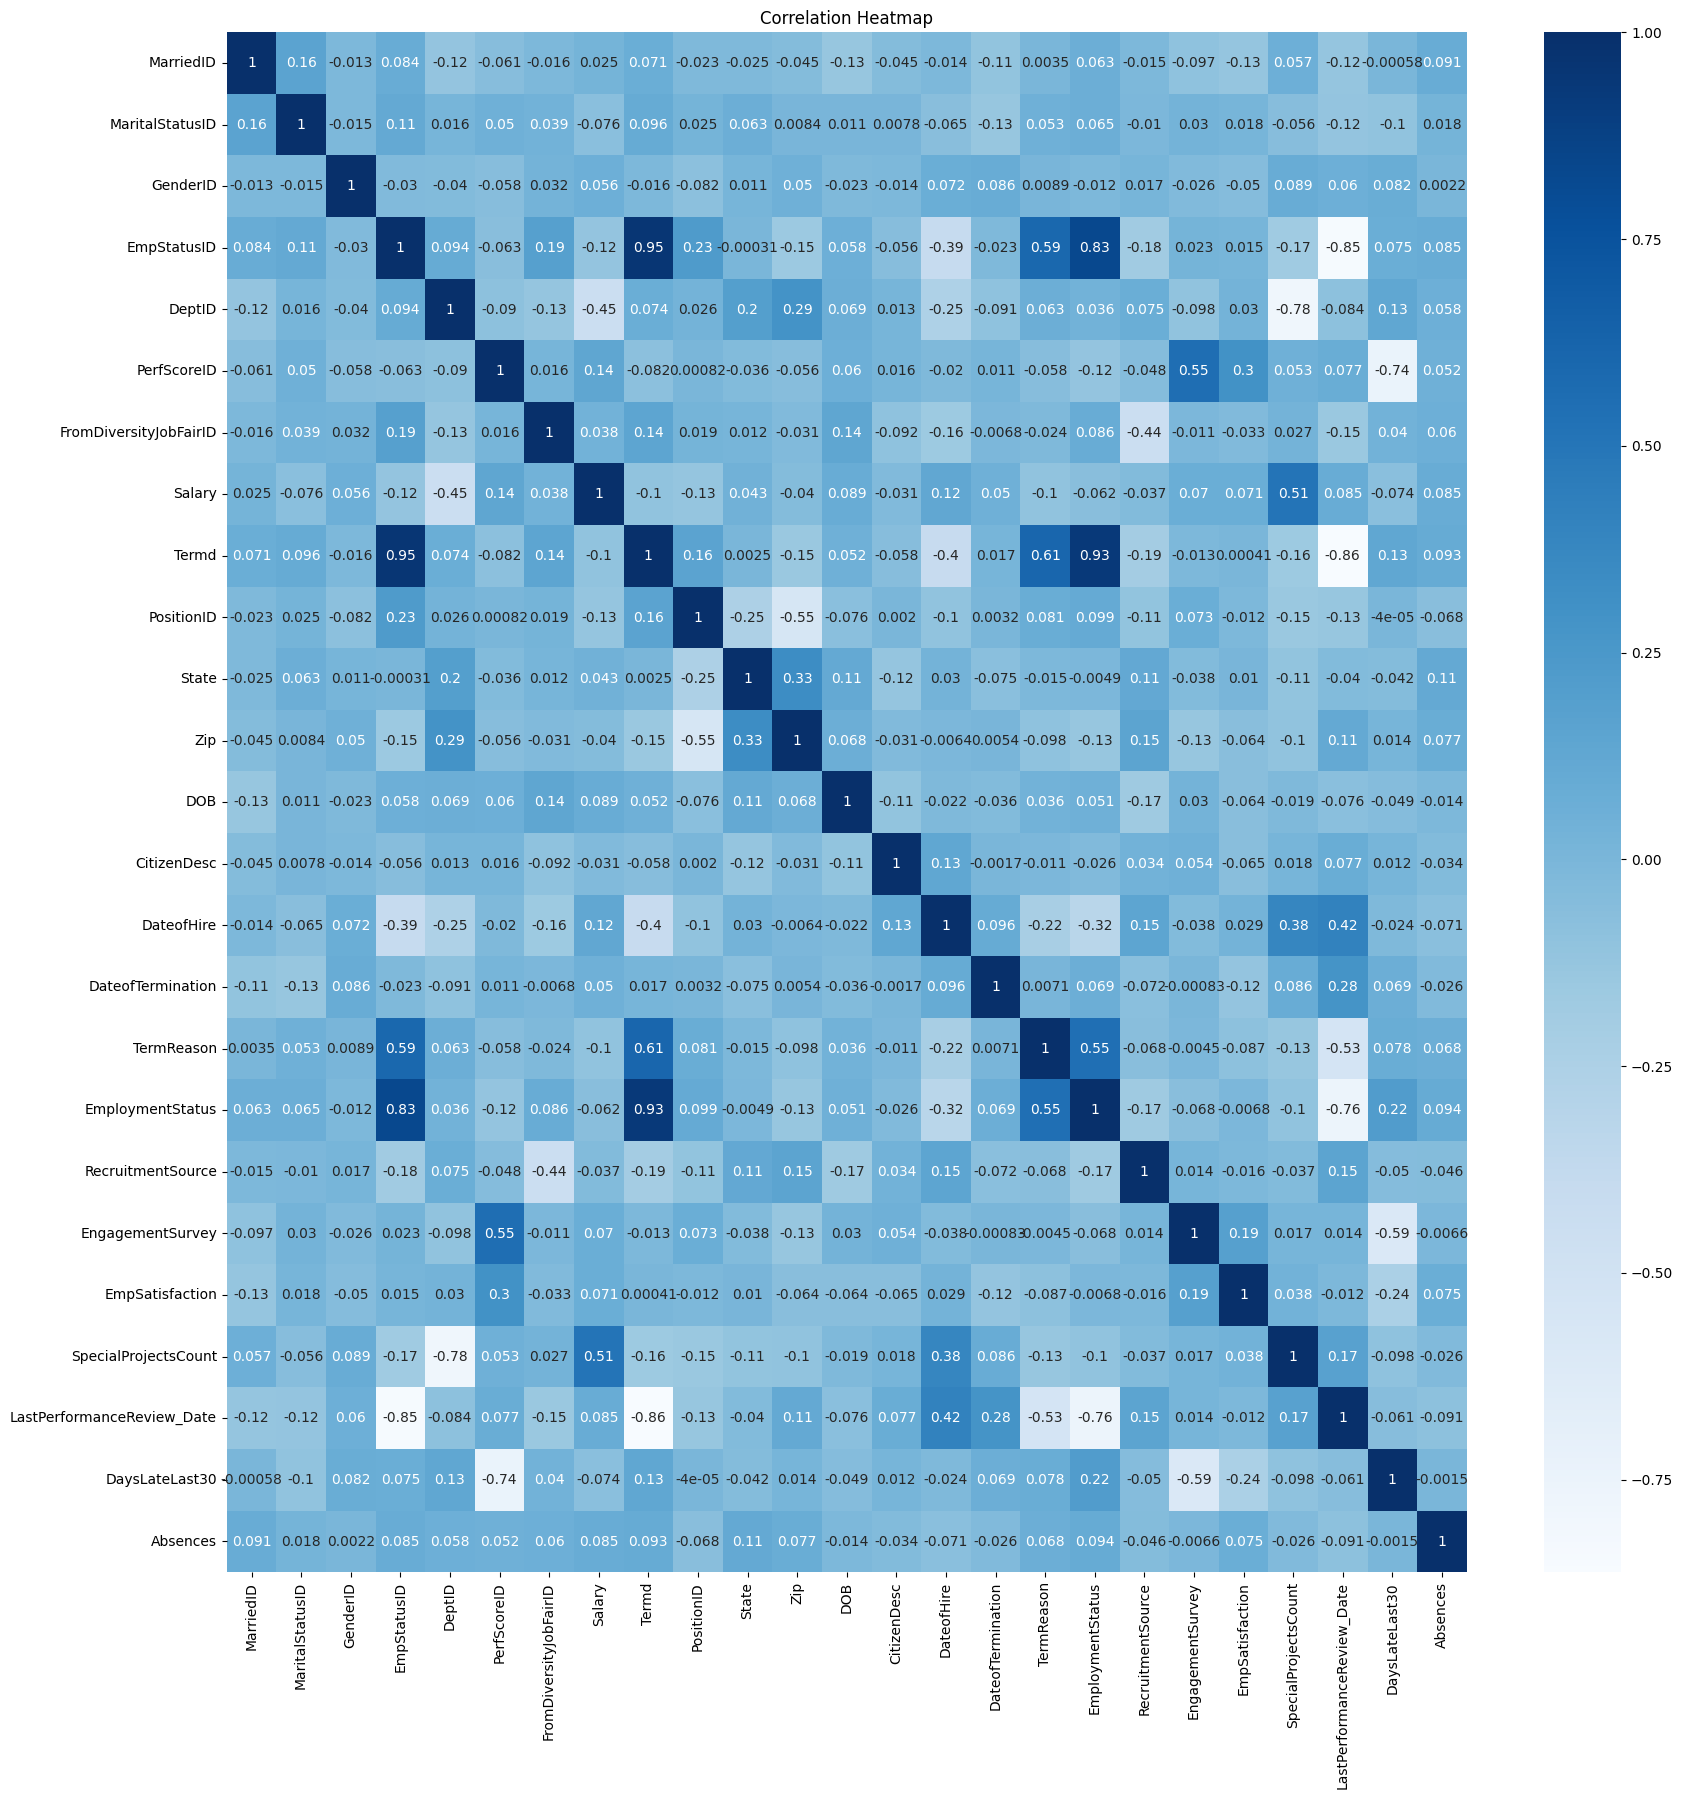

In [48]:
# correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [49]:
df.columns

Index(['MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID',
       'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd',
       'PositionID', 'State', 'Zip', 'DOB', 'CitizenDesc', 'DateofHire',
       'DateofTermination', 'TermReason', 'EmploymentStatus',
       'RecruitmentSource', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [50]:
# Drop highly correlated features   
df.drop(columns=['EmpStatusID'], inplace=True)

In [51]:
# Drop ZIP column
df.drop(columns=['Zip'], inplace=True)

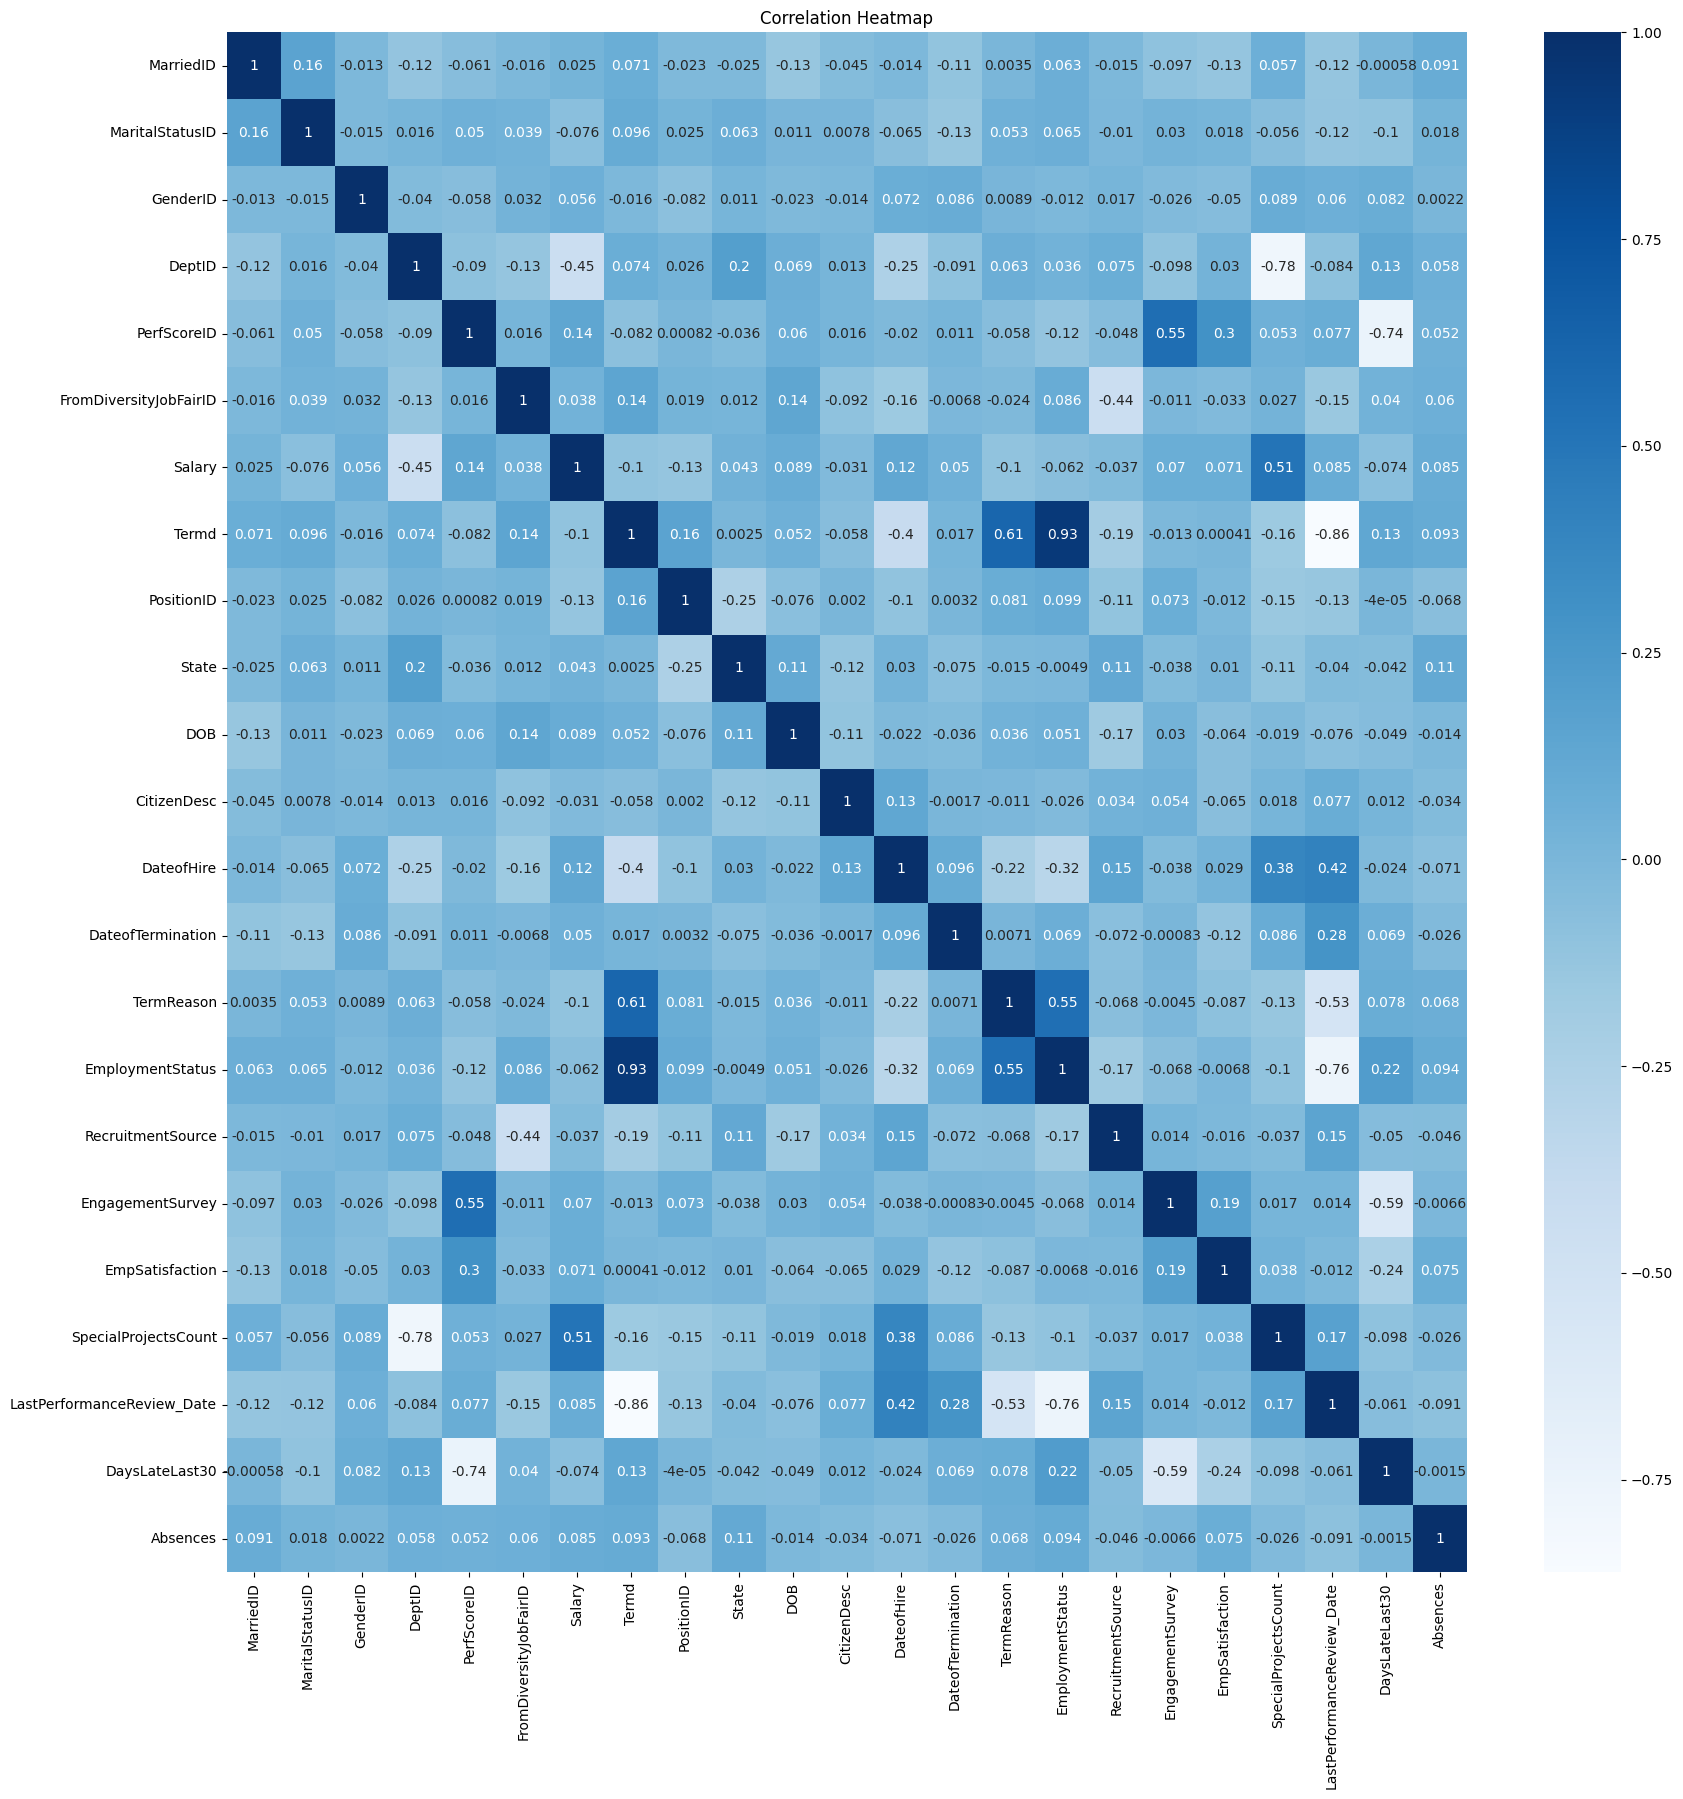

In [52]:
# correlation heatmap   
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

    Regression Data

In [53]:
reg_data = df[df['Termd'] == 1]

In [54]:
now = datetime.now()
df['Age'] = (now - df['DOB']).dt.days // 365
df['DaysSinceHire'] = (now - df['DateofHire']).dt.days
df['DaysSinceTermination'] = (now - df['DateofTermination']).dt.days
df['DaysSinceLastReview'] = (now - df['LastPerformanceReview_Date']).dt.days

In [55]:
# fill with standart diveation  
df['DateofTermination'].fillna(df['DateofTermination'].std(), inplace=True)

In [56]:
df_SectionC = df.copy()

In [57]:
# drop 'Termd' column
df.drop(columns=['Termd'], inplace=True)

In [58]:
# # Drop the date columns
df.drop(columns=['DOB', 'DateofTermination','DateofHire', 'LastPerformanceReview_Date'], inplace=True)

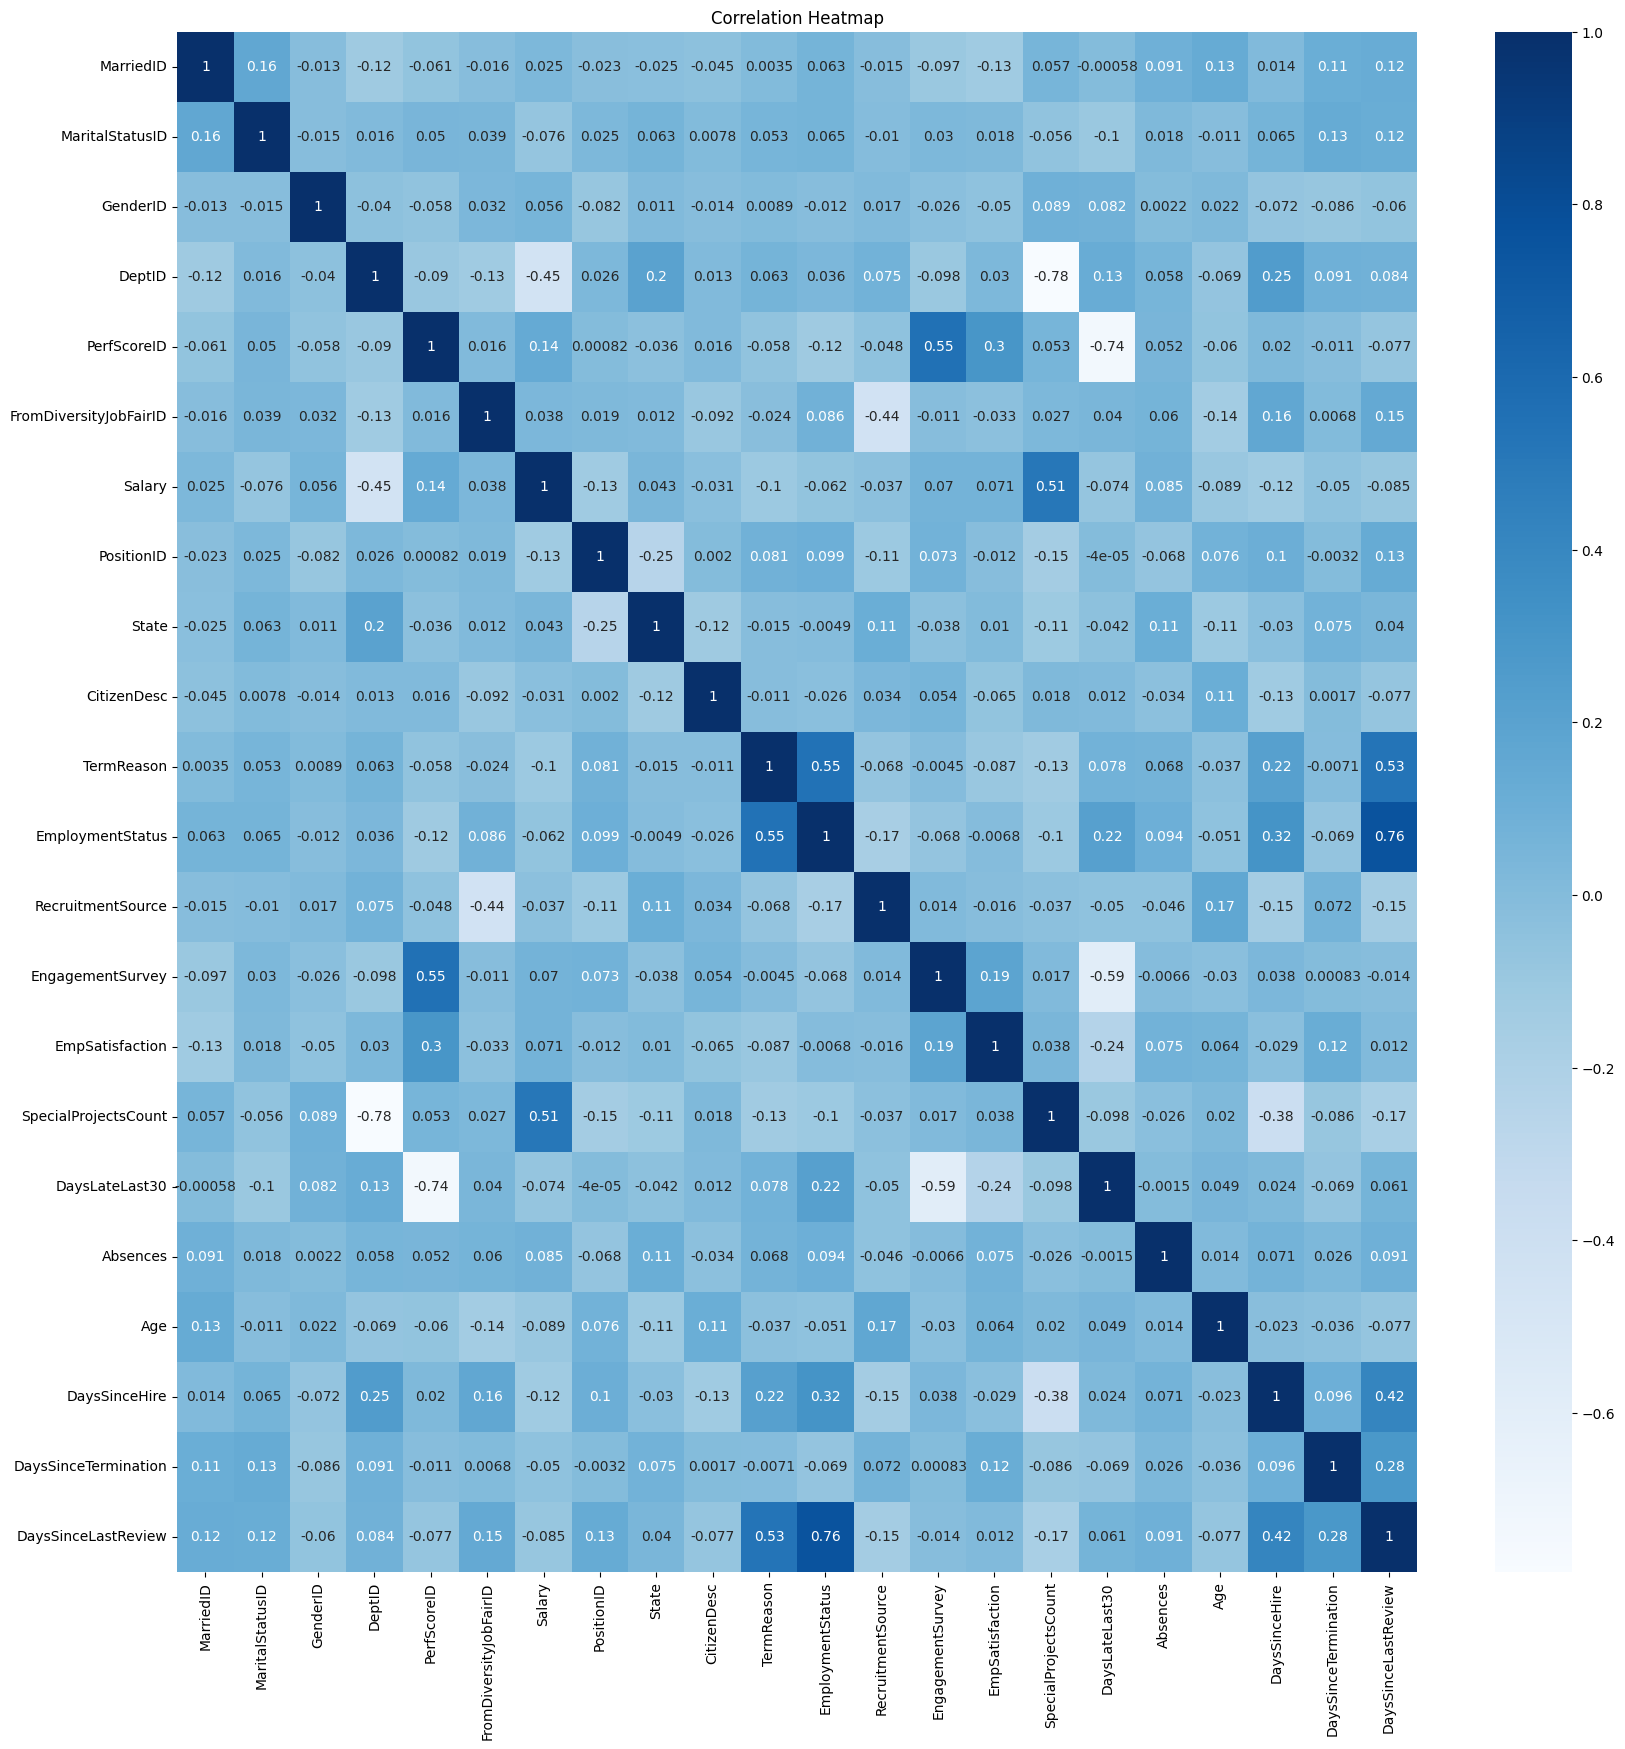

In [59]:
# correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()
    

## Scaling

In [60]:
df.columns

Index(['MarriedID', 'MaritalStatusID', 'GenderID', 'DeptID', 'PerfScoreID',
       'FromDiversityJobFairID', 'Salary', 'PositionID', 'State',
       'CitizenDesc', 'TermReason', 'EmploymentStatus', 'RecruitmentSource',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'DaysLateLast30', 'Absences', 'Age', 'DaysSinceHire',
       'DaysSinceTermination', 'DaysSinceLastReview'],
      dtype='object')

In [61]:
# create new df with just the target
target = df['EmploymentStatus']
df = df.drop(columns=['EmploymentStatus'])
# scale the df  and put it back into a df
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# merge the target back into the df merged by merge on left index
df = df.merge(target, left_index=True, right_index=True)

In [62]:
df.head()

MarriedID  MaritalStatusID  GenderID  DeptID  PerfScoreID   
1        1.0             0.25       0.0     0.8     0.666667  \
2        1.0             0.25       0.0     0.8     0.666667   
3        0.0             0.50       0.0     0.8     0.666667   
4        0.0             0.00       0.0     0.8     1.000000   
5        0.0             0.00       0.0     0.6     0.666667   

   FromDiversityJobFairID    Salary  PositionID    State  CitizenDesc  ...   
1                     0.0  0.097139    0.655172  0.37037          1.0  ...  \
2                     0.0  0.097315    0.620690  0.37037          1.0  ...   
3                     0.0  0.028197    0.620690  0.37037          1.0  ...   
4                     0.0  0.061097    0.620690  0.37037          1.0  ...   
5                     0.0  0.246953    0.793103  0.37037          1.0  ...   

   EngagementSurvey  EmpSatisfaction  SpecialProjectsCount  DaysLateLast30   
1          0.489691             0.50                   0.0             0.0  \
2          0.958763             1.00                   0.0             0.0   
3          1.000000             0.75                   0.0             0.0   
4          1.000000             1.00                   0.0             0.0   
5          0.494845             0.50                   0.5             0.0   

   Absences   Age  DaysSinceHire  DaysSinceTermination  DaysSinceLastReview   
1  0.105263  0.84       0.561131              0.747495             0.787052  \
2  0.736842  0.84       0.840491              0.747495             0.017772   
3  0.052632  0.83       0.559816              0.265531             0.356395   
4  0.736842  0.96       0.519939              0.265531             0.016503   
5  0.947368  0.94       0.292945              0.265531             0.018089   

   EmploymentStatus  
1                 2  
2                 2  
3                 1  
4                 2  
5                 1  

[5 rows x 22 columns]

## Section A - Data Exploration and Pre-processing

### Data Exploration

We started the data exploration by creating various visualizations to understand the data better. Here are the visualizations we created:

1. **Pie Plot of Race Description:** This plot helped us understand the overall diversity profile of the organization.

2. **Box Plot of Gender and another for CitezinShip:** Helped us to understand the diversity of the organization.

3. **Bar Plot of Performance Score by Manager:** This plot helped us understand the relationship between who a person works for and their performance score.

4. **Histogram of Salary:** This plot helped us understand the distribution of salaries among the employees.

5. **Box Plot of Salary by Department:** This plot helped us understand whether there are areas of the company where pay is not equitable.

6. **Box Plot of Slary by Gender:** This plot helped us understand whether there are areas of the company where pay is not equitable.

7. **Scatter Plot Salary and Engagement Survey Score:** This plot helped us understand the relationship between salary and engagement survey score.

8. **Box Plot for the PerfScoreID and ManagerName:** This plot helped us understand the relationship between who a person works for and their performance score.

9. **Bar Plot for Performance and Employee Satisfaction:** This plot helped us understand the relationship between employee satisfaction and performance score.

10. **Histogram of Absences:** This plot helped us understand the distribution of absences among the employees.

11. **Scatter Plot of Performance and Salary.** This plot helped us understand the relationship between salary and performance score.

### Data Pre-processing


After exploring the data, we moved on to pre-processing the data to prepare it for the machine learning models. Here are the pre-processing steps we performed:

1. **Checked for Missing Values:** We found that the dataset does not contain any missing values.

2. **Checked for Duplicate Rows:** We found that the dataset does not contain any duplicate rows.

3. **Performed Feature Scaling on the 'Salary' Column:** We used the StandardScaler to ensure that the 'Salary' column has the same scale as the other columns.

4. **Date Pre-processing Summary:** After pre-processing the data, we ended up with a dataset that contains columns with the years not the dates, and all the columns are numeric.

5. **Drop Columns:** We dropped the Date and the Categorical columns because they are not useful in our case, because we have all the features as numeric.

6. **One Hot Encoding:** We used one hot encoding to convert the categorical columns to numeric columns, the important features like Department, because we want to know why he 

    is got terminated ,if there is no why? so he is not terminated and the valuse would be all false.

7. **Label Encoding:** We used label encoding for the EmploymentStatus column because it is our target column.

8. **Feature Engineering:** we used all the dates and created a features that contains days and years so we can use it and drop the dates, because its easier to use the days and years than the dates.

9. **Data Balancing:** The target column is imbalanced, so we used SMOTE to balance it.

10. **Data Scaling:** We used the StandardScaler to ensure that all the columns has the same scale.

# Section B (Dimensionality Reduction) to Keep must add explaination

------------------------------------------------------------------------------------------------------------------------------

    Didn't understand if we should remove the EmploymentStatus or not, so I did both.

In [63]:
# # Create PCA object with 2 components
# pca1 = PCA(n_components=2)
# df_pca = pca1.fit_transform(df.drop('EmploymentStatus', axis=1))

# df_pca = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])
# df_pca = pd.concat([df_pca, df['EmploymentStatus'].reset_index(drop=True)], axis=1)

# label_mapping = {1: 'Active', 2: 'Voluntarily Terminated', 3: 'Terminated for Cause'}
# df_pca['EmploymentStatusText'] = df_pca['EmploymentStatus'].map(label_mapping)

In [64]:
# plt.figure(figsize=(8,5))
# sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='EmploymentStatusText')
# plt.title('PCA with 2 components')
# plt.show()

In [65]:
# explained_variance = pca1.explained_variance_ratio_
# print(f"Explained variance (2 components): {explained_variance}")

# feature_contribution = pd.DataFrame(np.abs(pca1.components_), columns=df.drop('EmploymentStatus', axis=1).columns)
# print("Features contributing the most to PC1:")
# print(feature_contribution.iloc[0].sort_values(ascending=False))

In [66]:
# print("Features contributing the most to PC2:")
# print(feature_contribution.iloc[1].sort_values(ascending=False))

    with EmploymentStatus

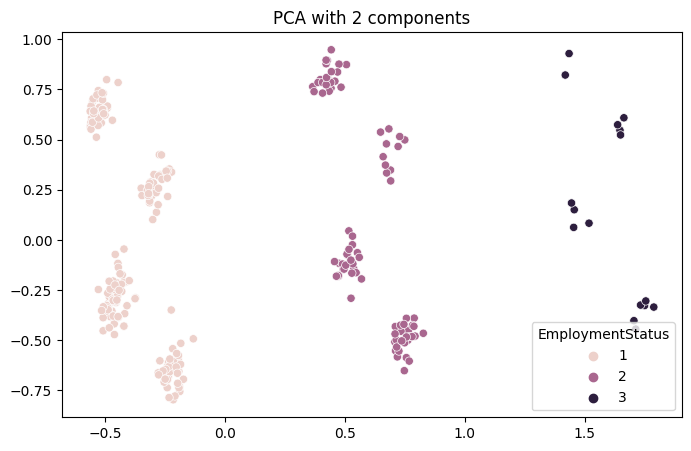

In [67]:
# apply pca with the target
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)
# scatter plot for 2 components
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_pca, x=df_pca[:,0], y=df_pca[:,1], hue=df['EmploymentStatus'])
plt.title('PCA with 2 components')
plt.show()

In [68]:
# print the most effective features for the pca for each component
feature_contribution = pd.DataFrame(np.abs(pca.components_), columns=df.columns)
print("Features contributing the most to PC1:")
print(feature_contribution.iloc[0].sort_values(ascending=False))

Features contributing the most to PC1:
EmploymentStatus          0.962779
GenderID                  0.238324
MarriedID                 0.074648
DaysSinceTermination      0.045484
Absences                  0.040820
FromDiversityJobFairID    0.040611
DeptID                    0.032502
SpecialProjectsCount      0.030615
EmpSatisfaction           0.029100
TermReason                0.028146
DaysSinceLastReview       0.027915
EngagementSurvey          0.015459
PositionID                0.013284
State                     0.013275
Age                       0.011964
RecruitmentSource         0.007879
MaritalStatusID           0.006556
CitizenDesc               0.004161
DaysSinceHire             0.003563
Salary                    0.003337
DaysLateLast30            0.002892
PerfScoreID               0.000999
Name: 0, dtype: float64


In [69]:
print("Features contributing the most to PC2:")
print(feature_contribution.iloc[1].sort_values(ascending=False))

Features contributing the most to PC2:
MarriedID                 0.882562
GenderID                  0.365582
EmploymentStatus          0.151769
Age                       0.128554
DaysSinceLastReview       0.120002
Absences                  0.092720
MaritalStatusID           0.089664
DaysSinceTermination      0.076718
DeptID                    0.055348
EmpSatisfaction           0.054628
EngagementSurvey          0.040212
TermReason                0.030793
DaysSinceHire             0.025634
PerfScoreID               0.021249
SpecialProjectsCount      0.017656
PositionID                0.016280
RecruitmentSource         0.013246
State                     0.012294
CitizenDesc               0.012172
FromDiversityJobFairID    0.009690
DaysLateLast30            0.008826
Salary                    0.002347
Name: 1, dtype: float64


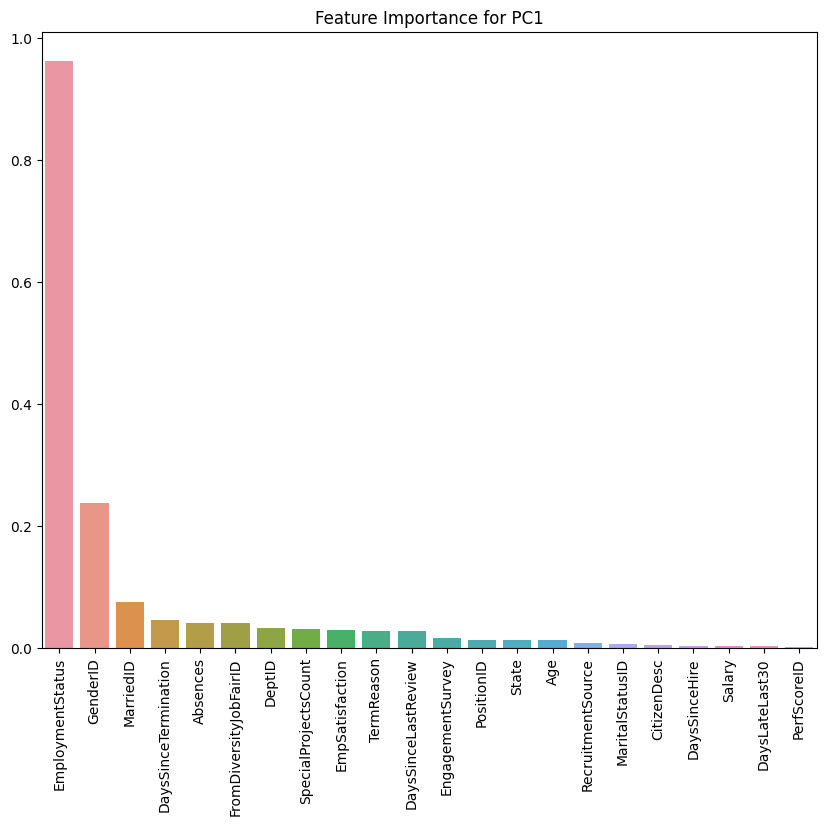

In [70]:
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_contribution.iloc[0].sort_values(ascending=False).index, y=feature_contribution.iloc[0].sort_values(ascending=False).values)
plt.title('Feature Importance for PC1')
plt.xticks(rotation=90)
plt.show()

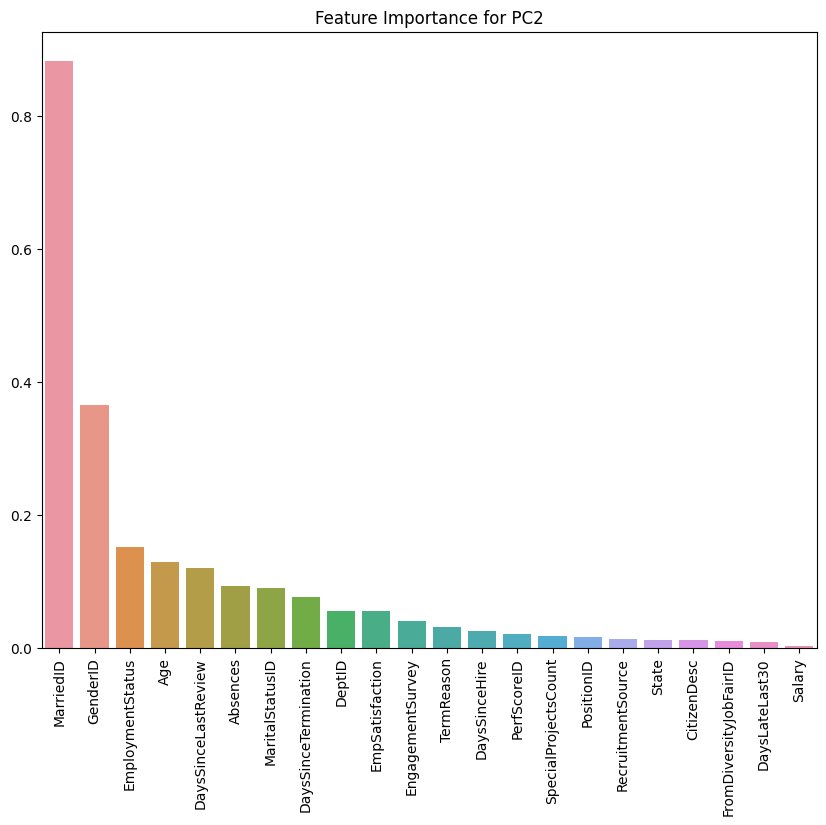

In [71]:
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_contribution.iloc[1].sort_values(ascending=False).index, y=feature_contribution.iloc[1].sort_values(ascending=False).values)
plt.title('Feature Importance for PC2')
plt.xticks(rotation=90)
plt.show()

    After removing the features

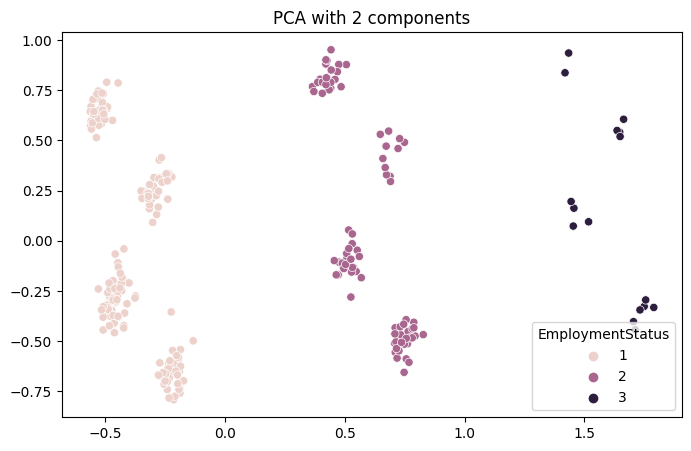

In [72]:
df_dropped = df.drop(['Salary','PerfScoreID'], axis=1)
pca = PCA(n_components=2)
df_pca1 = pca.fit_transform(df_dropped)
# scatter plot for 2 components
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_pca1, x=df_pca1[:,0], y=df_pca1[:,1], hue=df['EmploymentStatus'])
plt.title('PCA with 2 components')
plt.show()

    After removing the least effictive features, we can see that the plot hasn't changed. This means that the features we removed were not effective in predicting the target column.

In [73]:
# print the most effective features for the pca for each component
feature_contribution = pd.DataFrame(np.abs(pca.components_), columns=df_dropped.columns)
print("Features contributing the most to PC1:")
print(feature_contribution.iloc[0].sort_values(ascending=False))

Features contributing the most to PC1:
EmploymentStatus          0.962749
GenderID                  0.238420
MarriedID                 0.074654
DaysSinceTermination      0.045506
Absences                  0.040856
FromDiversityJobFairID    0.040645
DeptID                    0.032697
SpecialProjectsCount      0.030906
EmpSatisfaction           0.029017
TermReason                0.028070
DaysSinceLastReview       0.027833
EngagementSurvey          0.015357
State                     0.013274
PositionID                0.013231
Age                       0.012025
RecruitmentSource         0.007905
MaritalStatusID           0.006575
CitizenDesc               0.004152
DaysSinceHire             0.003608
DaysLateLast30            0.002745
Name: 0, dtype: float64


In [74]:
print("Features contributing the most to PC2:")
print(feature_contribution.iloc[1].sort_values(ascending=False))

Features contributing the most to PC2:
MarriedID                 0.877969
GenderID                  0.376884
EmploymentStatus          0.154400
Age                       0.126991
DaysSinceLastReview       0.119951
Absences                  0.093082
MaritalStatusID           0.089732
DaysSinceTermination      0.076986
DeptID                    0.055678
EmpSatisfaction           0.052205
EngagementSurvey          0.036968
TermReason                0.030386
DaysSinceHire             0.025901
SpecialProjectsCount      0.017696
PositionID                0.016842
RecruitmentSource         0.013591
DaysLateLast30            0.013337
State                     0.012329
CitizenDesc               0.012024
FromDiversityJobFairID    0.009501
Name: 1, dtype: float64


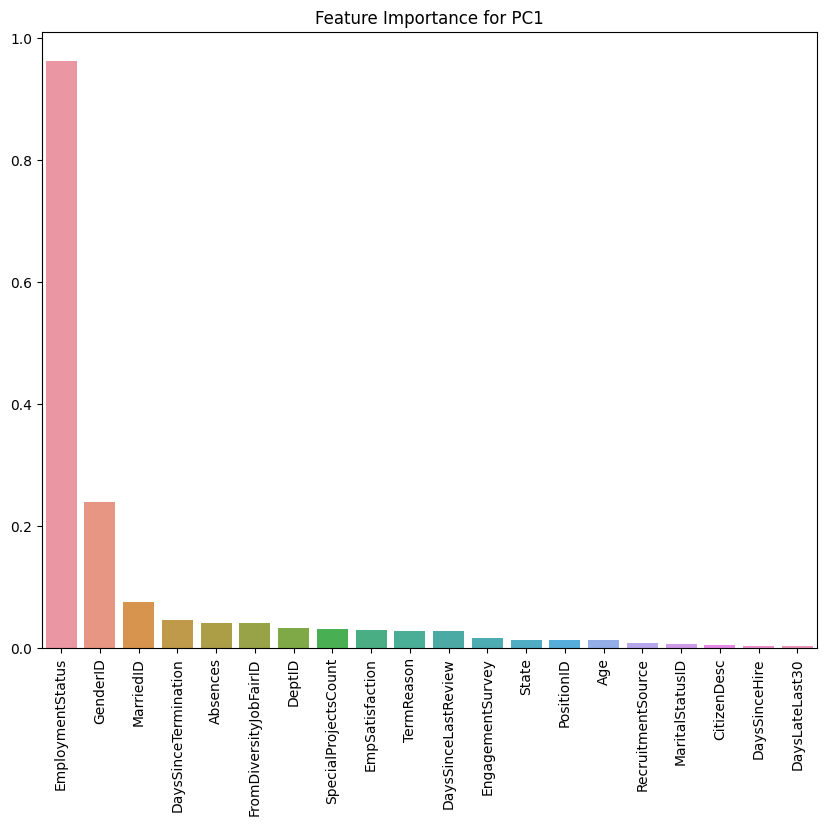

In [75]:
# plot for feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_contribution.iloc[0].sort_values(ascending=False).index, y=feature_contribution.iloc[0].sort_values(ascending=False).values)
plt.title('Feature Importance for PC1')
plt.xticks(rotation=90)
plt.show()

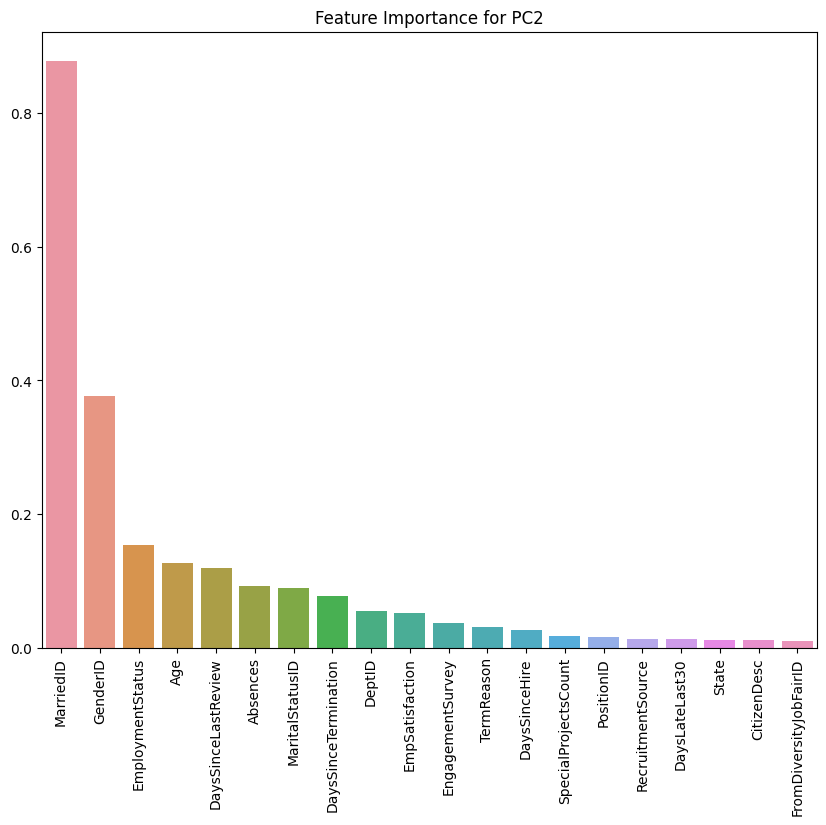

In [76]:
# plot for feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_contribution.iloc[1].sort_values(ascending=False).index, y=feature_contribution.iloc[1].sort_values(ascending=False).values)
plt.title('Feature Importance for PC2')
plt.xticks(rotation=90)
plt.show()

    Dropping Most important features


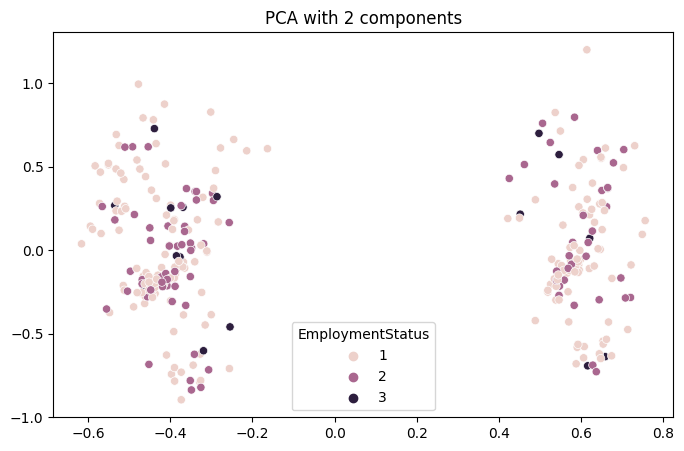

In [77]:
# Assuming 'least_contributing_feature' is the feature you identified
df_dropped2 = df.drop(['EmploymentStatus','GenderID'], axis=1)
pca = PCA(n_components=2)
df_pca2 = pca.fit_transform(df_dropped2)
# scatter plot for 2 components
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_pca2, x=df_pca2[:,0], y=df_pca2[:,1], hue=df['EmploymentStatus'])
plt.title('PCA with 2 components')
plt.show()


    After removing the Most effictive features, we can see that the plot has changed, after removing them we can see that the data is all over the place and its not clear.

•	There is a specific feature that has the most effect on the separation of the different employment status groups. Can you identify it? 

In [78]:
loadings = pca.components_

# Calculate the sum of squared loadings for each feature
sum_of_squared_loadings = np.sum(loadings**2, axis=0)

# Get the feature with the maximum sum of squared loadings
most_important_feature_index = np.argmax(sum_of_squared_loadings)
most_important_feature = df.drop('EmploymentStatus', axis=1).columns[most_important_feature_index]

print(most_important_feature)

MarriedID


    We thought about this way, that the most important feature for the seperation should be that has higher variance, so we sum all the variance for each feature and we found that the most important feature is the "SpecialProjectsCount".

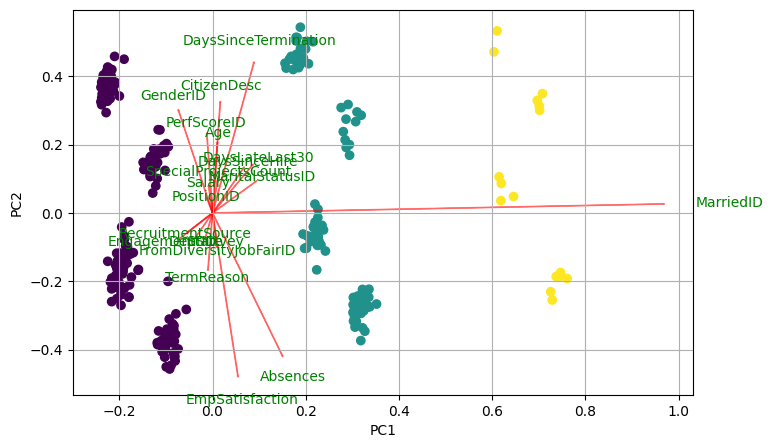

In [79]:
def biplot(score, coeff, labels=None):
    plt.figure(figsize=(8,5))
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c = df['EmploymentStatus'])
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
biplot(df_pca[:,0:2], np.transpose(pca.components_[0:2, :]), labels=df.columns)
plt.show()

    Bunos - Outliers

In [80]:
df_pca = pd.DataFrame(data=df_pca, columns=["PC1", "PC2"])
distances = np.sqrt((df_pca**2).sum(axis=1))
threshold = distances.mean() + 3*distances.std()
outlier_indices = df_pca.index[distances > threshold]
# merge the names and the df with the outliers
outliers = df_names.merge(df.iloc[outlier_indices], left_index=True, right_index=True)
outliers

Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  DeptID   
15       Bates, Norman  10061        1.0             0.25       0.0     0.8  \
18       Becker, Renee  10245        0.0             0.00       1.0     0.8   
25        Booth, Frank  10199        0.0             0.00       1.0     0.8   
53       Cole, Spencer  10292        1.0             0.25       1.0     0.4   
84   Estremera, Miguel  10280        1.0             0.25       0.0     0.8   
85      Evensen, April  10296        1.0             0.25       1.0     0.8   
86      Exantus, Susan  10290        0.0             0.00       1.0     0.4   
95       Forrest, Alex  10305        0.0             0.00       1.0     0.8   
104    Gill, Whitney    10142        1.0             0.25       1.0     0.4   
205       O'hare, Lynn  10303        0.0             0.00       1.0     0.6   
236   Robinson, Cherly  10285        0.0             0.50       1.0     0.4   
292    Voldemort, Lord  10118        1.0             0.25       1.0     0.8   

     PerfScoreID  FromDiversityJobFairID    Salary  PositionID  ...   
15      1.000000                     0.0  0.122393    0.655172  ...  \
18      0.666667                     0.0  0.029265    0.620690  ...   
25      0.666667                     0.0  0.142793    0.586207  ...   
53      0.666667                     0.0  0.187876    0.275862  ...   
84      0.666667                     0.0  0.061975    0.620690  ...   
85      0.000000                     0.0  0.092757    0.620690  ...   
86      0.000000                     0.0  0.040594    0.482759  ...   
95      0.666667                     0.0  0.035144    0.620690  ...   
104     0.666667                     0.0  0.144584    0.448276  ...   
205     1.000000                     1.0  0.311977    0.793103  ...   
236     0.666667                     1.0  0.507202    0.413793  ...   
292     0.666667                     0.0  0.049250    0.620690  ...   

     EngagementSurvey  EmpSatisfaction  SpecialProjectsCount  DaysLateLast30   
15           0.845361             0.50                 0.000             0.0  \
18           1.000000             0.50                 0.000             0.0   
25           0.585052             0.50                 0.000             0.0   
53           0.494845             0.50                 0.750             0.0   
84           0.518041             0.50                 0.000             0.0   
85           0.113402             1.00                 0.000             1.0   
86           0.020619             0.50                 0.750             0.5   
95           0.871134             0.50                 0.000             0.0   
104          0.819588             1.00                 0.875             0.0   
205          1.000000             1.00                 0.375             0.0   
236          0.819588             0.75                 0.750             0.0   
292          1.000000             0.50                 0.000             0.0   

     Absences   Age  DaysSinceHire  DaysSinceTermination  DaysSinceLastReview   
15   0.789474  0.07       0.157318              0.154643             0.014281  \
18   0.631579  0.02       0.501534              0.385772             0.014281   
25   0.684211  0.03       0.381902              0.519706             0.582037   
53   0.052632  0.86       0.262270              0.259853             0.011742   
84   0.789474  0.18       0.533742              0.302939             0.355443   
85   0.736842  0.83       0.253067              0.302939             0.017772   
86   0.052632  0.86       0.262270              0.302939             0.007617   
95   0.210526  0.87       0.262270              0.027722             0.003174   
104  1.000000  0.83       0.262270              0.446226             0.015551   
205  0.631579  0.94       0.533742              0.387442             0.410029   
236  0.368421  0.09       0.519939              0.368069             0.481117   
292  0.315789  0.07       0.572086          

------------------------------------------------------------------------------------------------------------------------------

# Section C (Classification) 

In [81]:
df_final = df_SectionC.copy()

In [82]:
# drop Termd
df_final.drop(columns=['Termd'], inplace=True)

In [83]:
df_final.drop(columns=['DOB','DateofTermination', 'DateofHire', 'LastPerformanceReview_Date','DaysSinceTermination'], inplace=True)

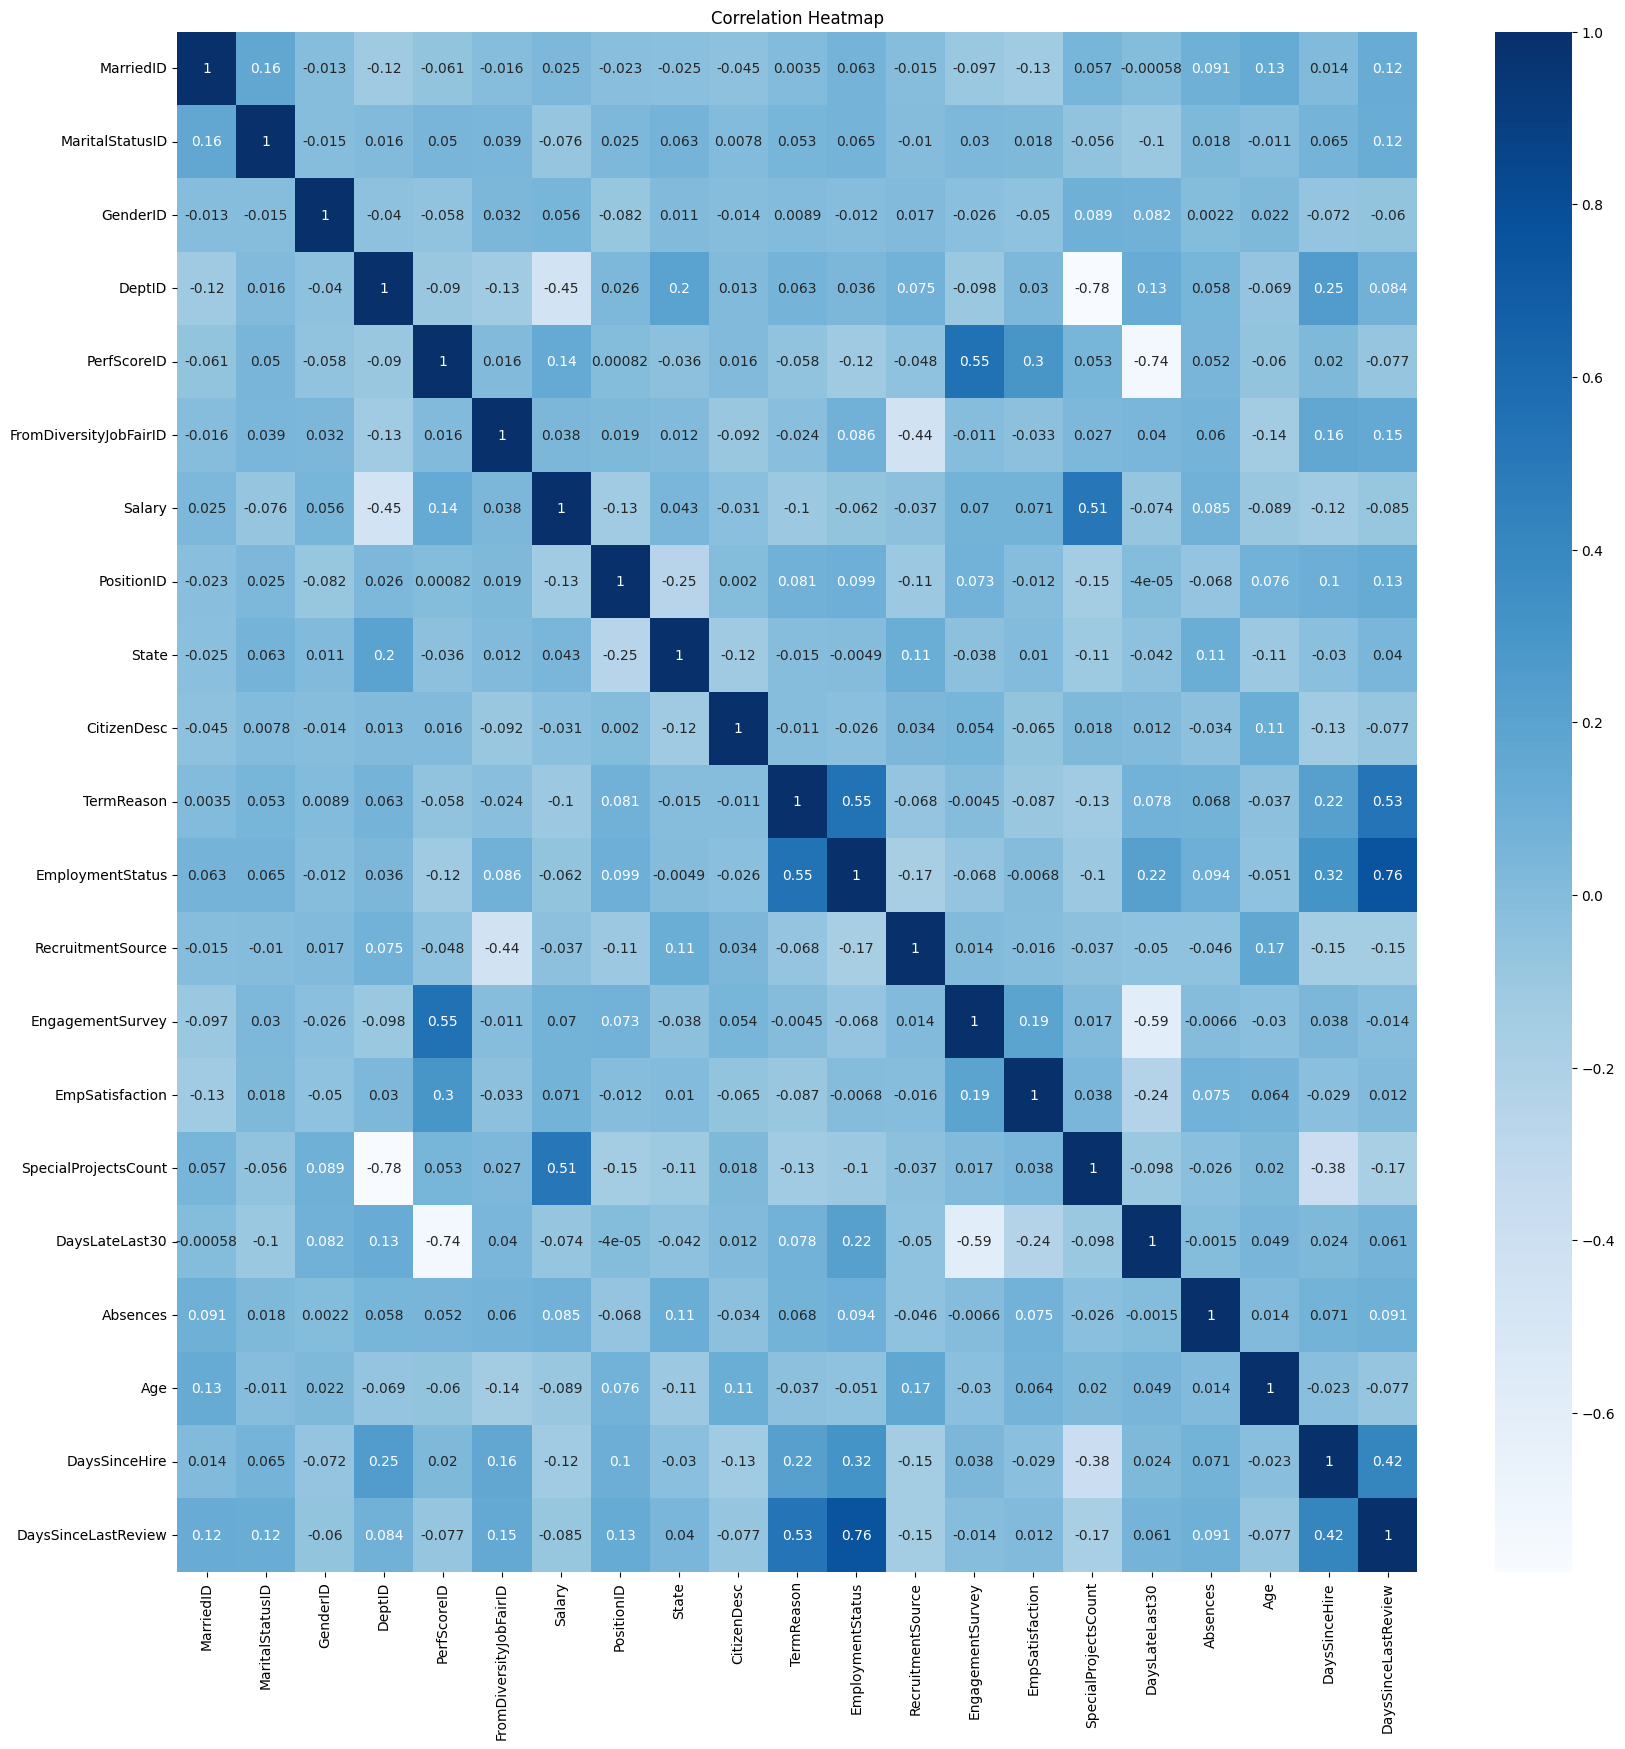

In [84]:
# correlation heatmap 
plt.figure(figsize=(20, 20))
sns.heatmap(df_final.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()
    

    Drop high colerated features

In [85]:
#drop TermReason SpecialProjectsCount EngagementSurvey
df_final.drop(columns=['TermReason','SpecialProjectsCount','EngagementSurvey','DaysSinceLastReview'], inplace=True)

In [86]:
df_final.columns

Index(['MarriedID', 'MaritalStatusID', 'GenderID', 'DeptID', 'PerfScoreID',
       'FromDiversityJobFairID', 'Salary', 'PositionID', 'State',
       'CitizenDesc', 'EmploymentStatus', 'RecruitmentSource',
       'EmpSatisfaction', 'DaysLateLast30', 'Absences', 'Age',
       'DaysSinceHire'],
      dtype='object')

In [87]:
# check the balance of the target
df_final['EmploymentStatus'].value_counts()

EmploymentStatus
1    198
2     88
3     16
Name: count, dtype: int64

    As we can see the target column is imbalanced, so we used SMOTE to balance it.

In [88]:
#Smote oversampling
oversample = SMOTE()
X_over, y_over = oversample.fit_resample(df_final.drop('EmploymentStatus', axis=1), df_final['EmploymentStatus'])

# split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

In [89]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# put it back into a df
X_train = pd.DataFrame(X_train, columns=X_over.columns)
X_test = pd.DataFrame(X_test, columns=X_over.columns)

    SVM

In [90]:
# Define the SVM classifier with the 'rbf' kernel
svm_clf = svm.SVC(kernel='rbf')

# Define the parameter grid for the GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

# Perform grid search cross validation on the SVM classifier
# use zero_division=1 to avoid the warning message
svm_grid = GridSearchCV(svm_clf, param_grid, cv=3)
svm_grid.fit(X_train, y_train)
# print the accuracy of the training
print(f"Training accuracy: {svm_grid.best_score_ :.2%}")
best_svm = svm_grid.best_estimator_

# Print the best parameters found by GridSearchCV
print('Best parameters found by grid search are:', svm_grid.best_params_)

# Predict the target variable for the test set
y_pred = best_svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

# Calculate specificity for each class
specificity = []
for i in range(cm.shape[0]):
    row = cm[i, :]
    TN = np.sum(cm) - np.sum(row)
    FP = np.sum(row) - cm[i, i]
    specificity.append(TN / (TN + FP))

results = pd.DataFrame(columns=['Model', 'Accuracy', 'Specificity','Recall'])
results.loc[0] = ['SVM', acc, specificity[0],recall]

results

Training accuracy: 79.79%
Best parameters found by grid search are: {'C': 1000, 'gamma': 0.1}


Model  Accuracy  Specificity    Recall
0   SVM  0.764706     0.842105  0.764706

In [91]:
def calculate_permutation_importance(model, X, y, metric):
    baseline_score = metric(y, model.predict(X))
    feature_importance = {}
    for feature in X.columns:
        X_permuted = X.copy()
        X_permuted[feature] = np.random.permutation(X_permuted[feature])
        permuted_score = metric(y, model.predict(X_permuted))
        feature_importance[feature] = baseline_score - permuted_score
    return feature_importance

In [92]:
svm_feature_importance = calculate_permutation_importance(svm_grid, X_test, y_test, accuracy_score)
svm_feature_importance = pd.DataFrame.from_dict(svm_feature_importance, orient='index', columns=['Importance'])
svm_feature_importance = svm_feature_importance.sort_values('Importance', ascending=False).reset_index()
svm_feature_importance = svm_feature_importance.rename(columns={'index': 'Feature'})

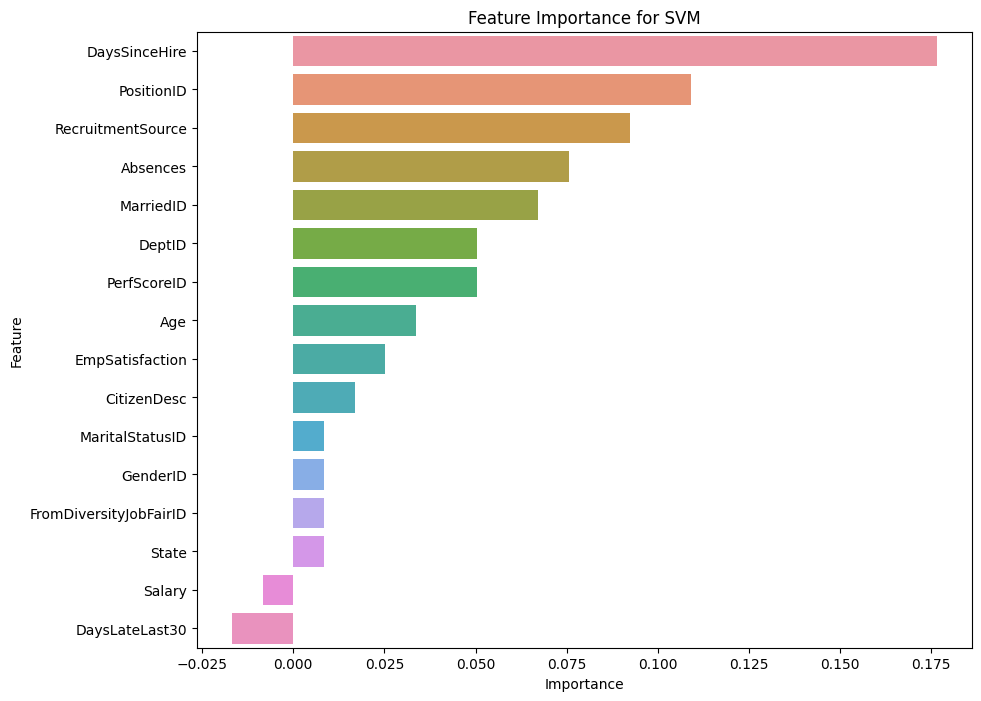

In [93]:
# feature importance plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=svm_feature_importance)
plt.title('Feature Importance for SVM')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## SVM Classifier

We've applied the Support Vector Machine (SVM) classifier to predict the employment status of the employees. Here are the steps we've taken:

1. **Define the SVM classifier:** We've defined the SVM classifier with the Radial basis function (RBF) kernel.

2. **Grid search cross validation:** We've performed grid search cross validation to find the best parameters for our SVM classifier. The parameters we've tuned are 'C' (Regularization parameter) and 'gamma' (Kernel coefficient for 'rbf').

3. **Fit the model:** We've fitted the model to our training data using the best parameters found by grid search.

4. **Predict the target variable:** We've used the trained model to predict the employment status for the test set.

5. **Evaluate the model:** We've printed the classification report which includes precision, recall, f1-score, and support for each class.

The best parameters found by grid search are 'C' = 10 and 'gamma' = 0.1. The accuracy of the SVM classifier on the test set is 88%.

    Random Forest Classifier

In [94]:
# Define the Random Forest classifier
rf_clf = RandomForestClassifier()

# Define the parameter grid for the GridSearchCV
param_grid = {'n_estimators': [100, 400, 500], 'max_depth': [5, 20, 25]}

# Perform grid search cross validation on the Random Forest classifier
rf_grid = GridSearchCV(rf_clf, param_grid, cv=3)
rf_grid.fit(X_train, y_train)
# accuracy for the training
print(f"Training accuracy: {rf_grid.best_score_ :.2%}")
best_rf = rf_grid.best_estimator_

# Print the best parameters found by GridSearchCV
print('Best parameters found by grid search are:', rf_grid.best_params_)

# feature importance
RF_feature_importance = best_rf.feature_importances_

# Predict the target variable for the test set
y_pred = best_rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

# Calculate specificity for each class
specificity = []
for i in range(cm.shape[0]):
    row = cm[i, :]
    TN = np.sum(cm) - np.sum(row)
    FP = np.sum(row) - cm[i, i]
    specificity.append(TN / (TN + FP))


results.loc[1] = ['Random Forest', acc, specificity[1],recall]

results

Training accuracy: 83.37%
Best parameters found by grid search are: {'max_depth': 20, 'n_estimators': 100}


Model  Accuracy  Specificity    Recall
0            SVM  0.764706     0.842105  0.764706
1  Random Forest  0.848739     0.952381  0.848739

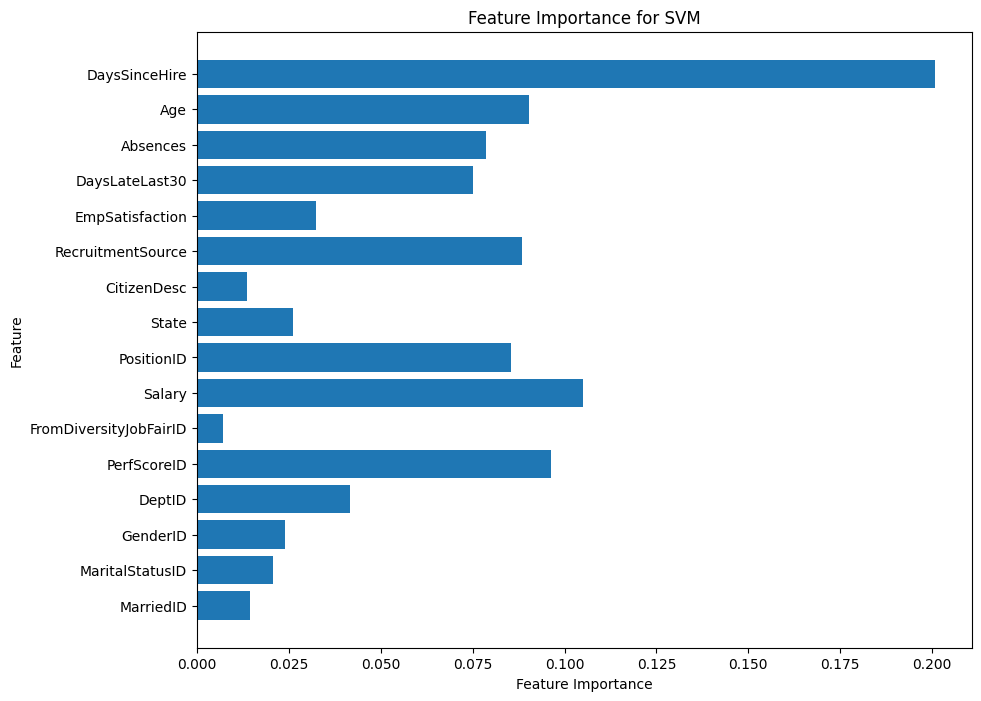

In [95]:
# Feature importance for svm plot
plt.figure(figsize=(10, 8))
plt.barh(X_over.columns, RF_feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for SVM')
plt.show()

    Gradiand Boosting Classifier

In [96]:
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)
param_grid_gb = {
    'n_estimators': [10, 50, 100 , 200],
    'learning_rate': [0.1, 0.3, 1],
    'max_depth': [3, 8, 10]
}
grid_search_gb = GridSearchCV(gradient_boosting, param_grid_gb, cv=3)
grid_search_gb.fit(X_train, y_train)
# accuracy for the training
print(f"Training accuracy: {grid_search_gb.best_score_ :.2%}")
best_gb = grid_search_gb.best_estimator_
print('Best parameters found by grid search are:', grid_search_gb.best_params_)

# Feature importance
GB_feature_importance = best_gb.feature_importances_

# Evaluate the tuned models
best_gb_predictions = best_gb.predict(X_test)

acc2 = accuracy_score(y_test, y_pred)
recall2 = recall_score(y_test, y_pred, average='weighted')
cm2 = confusion_matrix(y_test, y_pred)

# Calculate specificity for each class
specificity = []
for i in range(cm2.shape[0]):
    row = cm2[i, :]
    TN = np.sum(cm2) - np.sum(row)
    FP = np.sum(row) - cm2[i, i]
    specificity.append(TN / (TN + FP))


results.loc[2] = ['Gradiant Boost', acc2, specificity[2],recall2]

results


Training accuracy: 84.63%
Best parameters found by grid search are: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 200}


Model  Accuracy  Specificity    Recall
0             SVM  0.764706     0.842105  0.764706
1   Random Forest  0.848739     0.952381  0.848739
2  Gradiant Boost  0.848739     0.962963  0.848739

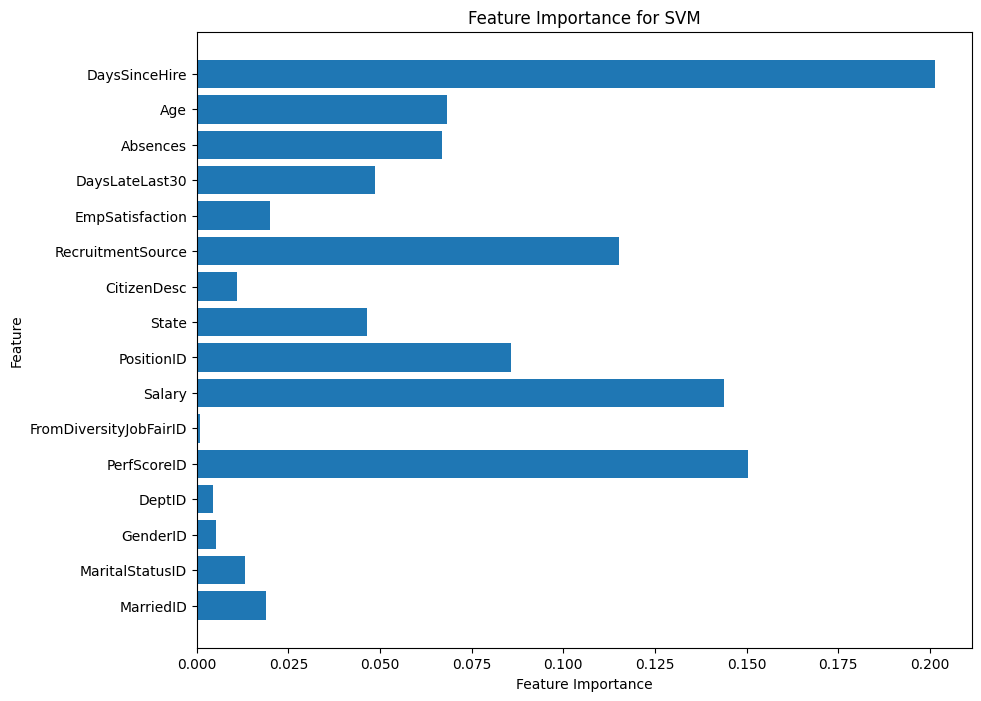

In [97]:
# Feature importance for svm plot sorted
plt.figure(figsize=(10, 8))
plt.barh(X_over.columns, GB_feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for SVM')
plt.show()


In [98]:
results

Model  Accuracy  Specificity    Recall
0             SVM  0.764706     0.842105  0.764706
1   Random Forest  0.848739     0.952381  0.848739
2  Gradiant Boost  0.848739     0.962963  0.848739

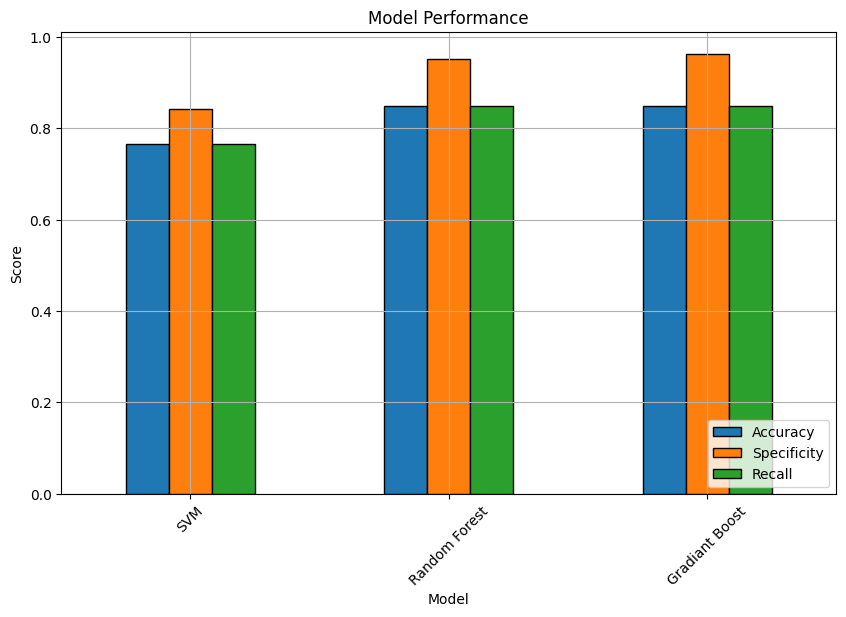

In [99]:
results.set_index('Model', inplace=True)

results.plot(kind='bar', edgecolor='black', figsize=(10, 6))
plt.ylabel('Score')
plt.title('Model Performance')
plt.grid(True)
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.show()

In [100]:
del df_SectionC
del df_final

------------------------------------------------------------------------------------------------------------------------------

# Section D (Regression)

In this section, we will build regression models to predict the time (in days) that will pass for an employee to terminate from their last survey of satisfaction. We will apply three different machine learning algorithms, provide feature importance for each model, perform parameter tuning, and evaluate the performance of each model. After that, we will post-process the results to find out the exact termination date for each employee.

In [101]:
now = datetime.now()
# Calculate the time until employee termination from the last satisfaction survey
reg_data['Age'] = (now - reg_data['DOB']).dt.days // 365
reg_data['DaysSinceHire'] = (now - reg_data['DateofHire']).dt.days
reg_data['DaysUntilTermination'] = (reg_data['DateofTermination'] - reg_data['LastPerformanceReview_Date']).dt.days

# numeric features all the int
numeric_features = reg_data.select_dtypes(include=['int64', 'float64']).columns
#normaliza min max
scaler = MinMaxScaler()
reg_data[numeric_features] = scaler.fit_transform(reg_data[numeric_features])
# drop the DateofTermination and LastPerformanceReview_Date
DataForSectionD3 = reg_data[['DateofTermination', 'DaysUntilTermination', 'LastPerformanceReview_Date']]
reg_data.drop(columns=['DateofTermination', 'LastPerformanceReview_Date','DOB','DateofHire'], inplace=True)

/var/folders/9m/__nmmq994v19_16qjdmqcbt40000gn/T/ipykernel_70102/3738407992.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data['Age'] = (now - reg_data['DOB']).dt.days // 365
/var/folders/9m/__nmmq994v19_16qjdmqcbt40000gn/T/ipykernel_70102/3738407992.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data['DaysSinceHire'] = (now - reg_data['DateofHire']).dt.days
/var/folders/9m/__nmmq994v19_16qjdmqcbt40000gn/T/ipykernel_70102/3738407992.py:5: SettingWithCopyWarning: 
A value is trying to be s

In [102]:
reg_data.head()

MarriedID  MaritalStatusID  GenderID  DeptID  PerfScoreID   
1         1.0             0.25       1.0     0.4     0.666667  \
2         1.0             0.25       0.0     0.8     0.666667   
4         0.0             0.50       0.0     0.8     0.666667   
10        1.0             0.25       0.0     0.8     0.666667   
11        1.0             0.25       1.0     0.8     0.666667   

    FromDiversityJobFairID    Salary  Termd  PositionID  State  ...   
1                      0.0  0.571041    0.0    0.892857     10  ...  \
2                      0.0  0.190982    0.0    0.642857     10  ...   
4                      0.0  0.054965    0.0    0.607143     10  ...   
10                     1.0  0.091978    0.0    0.607143     10  ...   
11                     1.0  0.020176    0.0    0.607143     10  ...   

    EmploymentStatus  RecruitmentSource  EngagementSurvey  EmpSatisfaction   
1                0.0                  4          0.986667         0.333333  \
2                0.0                  5          0.340000         0.333333   
4                0.0                  3          1.000000         0.666667   
10               0.0                  1          0.733333         0.666667   
11               0.0                  1          0.733333         0.333333   

    SpecialProjectsCount  DaysLateLast30  Absences  Age  DaysSinceHire   
1               0.857143             0.0  0.842105   48           3032  \
2               0.000000             0.0  0.105263   34           4396   
4               0.000000             0.0  0.052632   33           4390   
10              0.000000             0.0  0.578947   49           4572   
11              0.000000             0.0  0.736842   49           4124   

    DaysUntilTermination  
1                    113  
2                    132  
4                    218  
10                   348  
11                   136  

[5 rows x 22 columns]

In [103]:
# print negative values in reg_data['DaysUntilTermination'] index
print(reg_data[reg_data['DaysUntilTermination'] < 0].index)

Index([95], dtype='int64')


In [104]:
# drop index 95
reg_data.drop(index=95, inplace=True)

/var/folders/9m/__nmmq994v19_16qjdmqcbt40000gn/T/ipykernel_70102/435556733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data.drop(index=95, inplace=True)


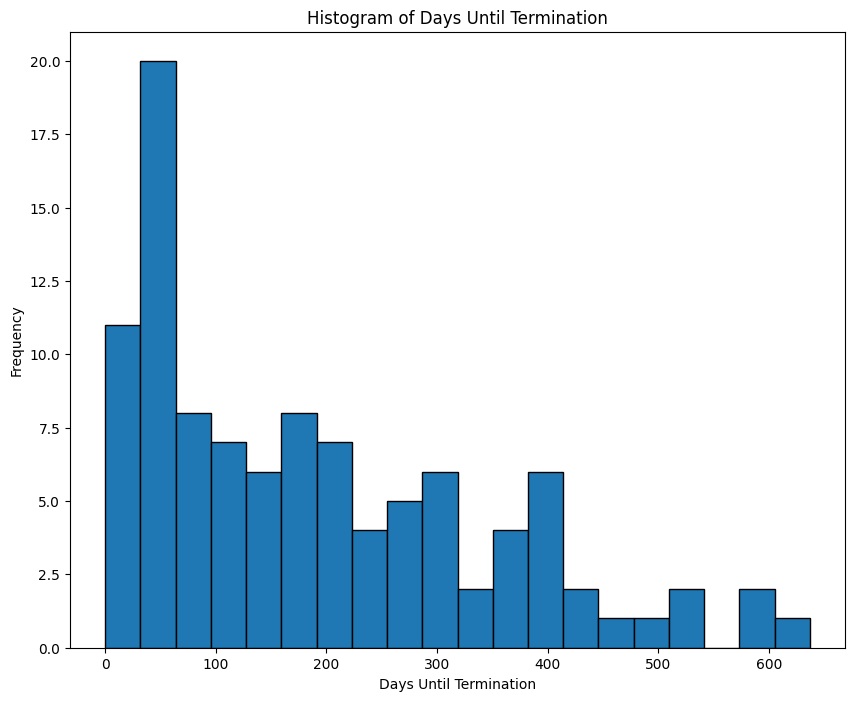

In [105]:
# histogram for the reg_data['DaysUntilTermination']
plt.figure(figsize=(10, 8))
plt.hist(reg_data['DaysUntilTermination'], bins=20, edgecolor='black')
plt.xlabel('Days Until Termination')
plt.ylabel('Frequency')
plt.title('Histogram of Days Until Termination')
plt.show()

In [106]:
reg_data.columns

Index(['MarriedID', 'MaritalStatusID', 'GenderID', 'DeptID', 'PerfScoreID',
       'FromDiversityJobFairID', 'Salary', 'Termd', 'PositionID', 'State',
       'CitizenDesc', 'TermReason', 'EmploymentStatus', 'RecruitmentSource',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'DaysLateLast30', 'Absences', 'Age', 'DaysSinceHire',
       'DaysUntilTermination'],
      dtype='object')

In [107]:
#drop termd
reg_data.drop(columns=['Termd'], inplace=True)

/var/folders/9m/__nmmq994v19_16qjdmqcbt40000gn/T/ipykernel_70102/2044064053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data.drop(columns=['Termd'], inplace=True)


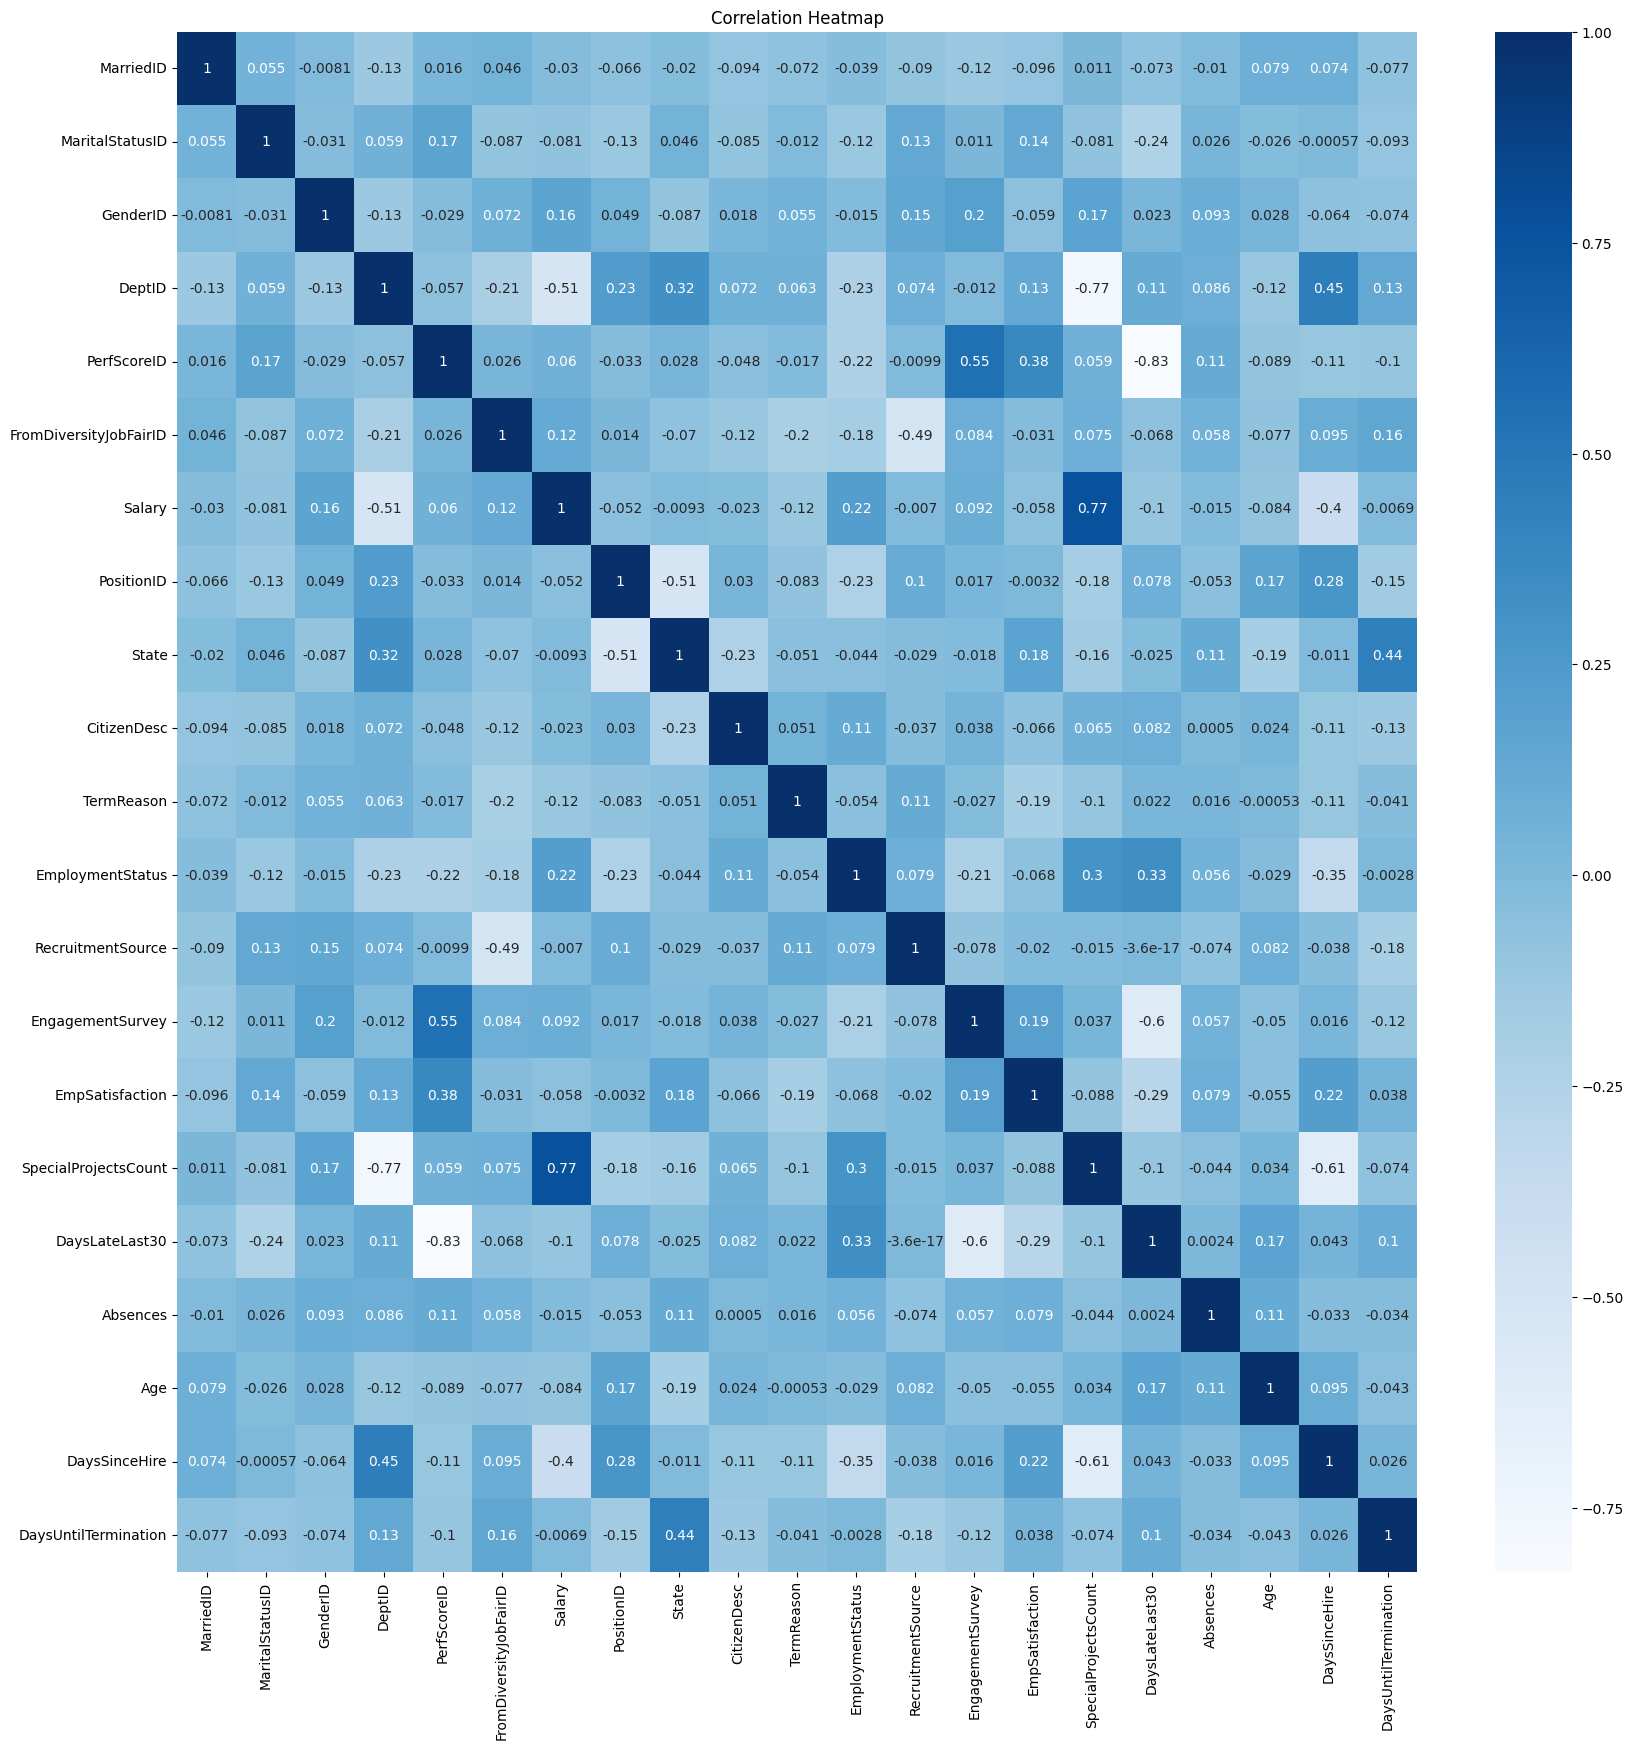

In [108]:
# correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(reg_data.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [109]:
reg_data.columns

Index(['MarriedID', 'MaritalStatusID', 'GenderID', 'DeptID', 'PerfScoreID',
       'FromDiversityJobFairID', 'Salary', 'PositionID', 'State',
       'CitizenDesc', 'TermReason', 'EmploymentStatus', 'RecruitmentSource',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'DaysLateLast30', 'Absences', 'Age', 'DaysSinceHire',
       'DaysUntilTermination'],
      dtype='object')

In [110]:
# Drop Salary DeptID PerfScoreID
reg_data.drop(columns=['Salary','EngagementSurvey','TermReason','PerfScoreID'], inplace=True)

/var/folders/9m/__nmmq994v19_16qjdmqcbt40000gn/T/ipykernel_70102/179081924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data.drop(columns=['Salary','EngagementSurvey','TermReason','PerfScoreID'], inplace=True)


In [111]:
reg_data.columns

Index(['MarriedID', 'MaritalStatusID', 'GenderID', 'DeptID',
       'FromDiversityJobFairID', 'PositionID', 'State', 'CitizenDesc',
       'EmploymentStatus', 'RecruitmentSource', 'EmpSatisfaction',
       'SpecialProjectsCount', 'DaysLateLast30', 'Absences', 'Age',
       'DaysSinceHire', 'DaysUntilTermination'],
      dtype='object')

In [112]:
# get the min and the max from the reg_data
min_duration = reg_data['DaysUntilTermination'].min()
max_duration = reg_data['DaysUntilTermination'].max()
max_duration, min_duration

(637, 0)

In [113]:
#Standardize the data
scaler = MinMaxScaler()
reg_data = pd.DataFrame(scaler.fit_transform(reg_data), columns=reg_data.columns)

In [114]:
# Prepare the target variable
y_reg = reg_data['DaysUntilTermination']
X_reg = reg_data.drop(['DaysUntilTermination'], axis=1)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

    Linear Regression

In [115]:
lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)
lr_predictions = lr.predict(X_test_reg)
lr_feature_importance = lr.coef_

In [116]:
# Define your scoring function
def scoring_func(estimator, X, y):
    y_pred = estimator.predict(X)
    return -r2_score(y, y_pred)  

result = permutation_importance(lr, X_test_reg, y_test_reg, scoring=scoring_func)
importances_df = pd.DataFrame(result.importances_mean, index=X_test_reg.columns, columns=['Importance'])
importances_df = importances_df.sort_values(by='Importance', ascending=False)

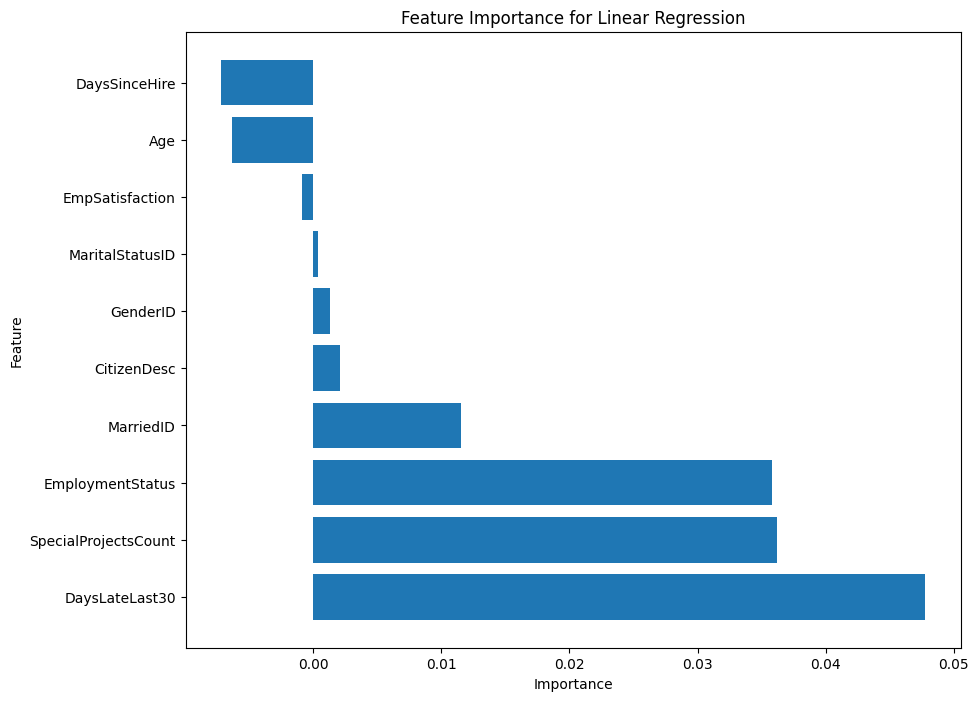

In [117]:
# top 10 features plots from top to bottom
plt.figure(figsize=(10, 8))
plt.barh(importances_df.index[:10], importances_df['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Linear Regression')
plt.show()

    Random Forest Regressor

In [118]:
rf = RandomForestRegressor(random_state=42)
param_grid_rf = {'n_estimators': [50, 100, 200, 300], 'max_depth': [None,1, 5, 8,10,25]}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_rf.fit(X_train_reg, y_train_reg)
rf_predictions = grid_rf.predict(X_test_reg)
best_model_rf = grid_rf.best_estimator_
print('Best parameters found by grid search are:', grid_rf.best_params_)

RF_feature_importance = best_model_rf.feature_importances_

Best parameters found by grid search are: {'max_depth': 8, 'n_estimators': 300}


In [119]:
result = permutation_importance(grid_rf, X_test_reg, y_test_reg, scoring=scoring_func)
importances_df = pd.DataFrame(result.importances_mean, index=X_test_reg.columns, columns=['Importance'])
importances_df = importances_df.sort_values(by='Importance', ascending=False)

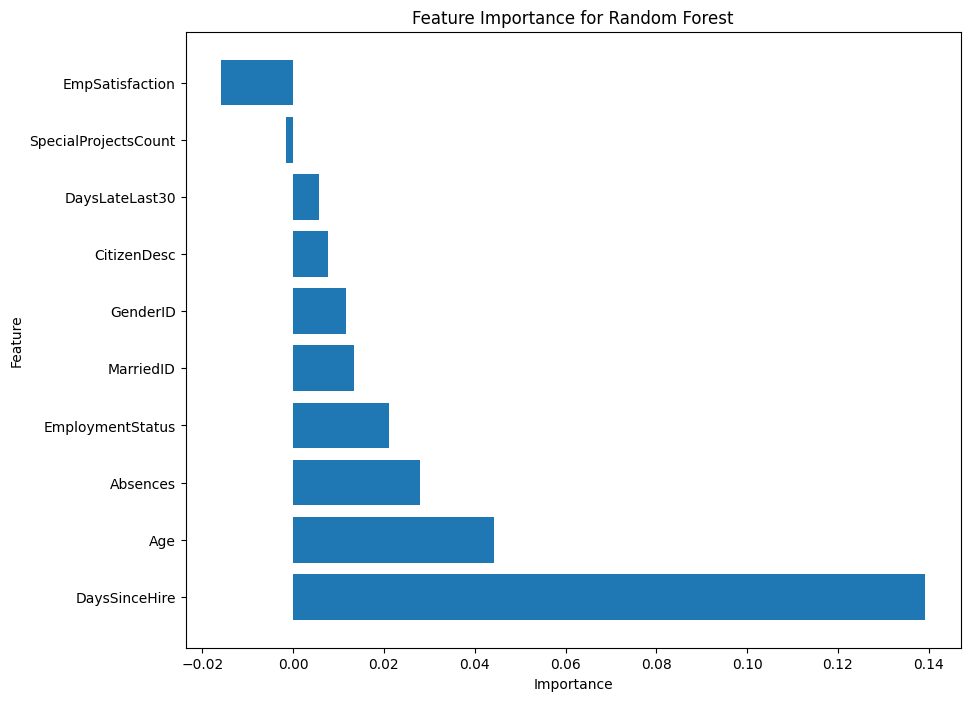

In [120]:
# top 10 features plots from top to bottom
plt.figure(figsize=(10, 8))
plt.barh(importances_df.index[:10], importances_df['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest')
plt.show()

    Gradiand Boosting Regressor

In [121]:
gb = GradientBoostingRegressor(random_state=42)

param_grid_gb = {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.05, 0.02 ,0.009], 'max_depth': [3, 5, 8]}

grid_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='neg_mean_squared_error')
grid_gb.fit(X_train_reg, y_train_reg)
gb_predictions = grid_gb.predict(X_test_reg)
best_model_gb = grid_gb.best_estimator_
GB_feature_importance = best_model_gb.feature_importances_

print('Best parameters found by grid search are:', grid_gb.best_params_)

Best parameters found by grid search are: {'learning_rate': 0.009, 'max_depth': 3, 'n_estimators': 100}


In [122]:
result = permutation_importance(grid_gb, X_test_reg, y_test_reg, scoring=scoring_func)
importances_df = pd.DataFrame(result.importances_mean, index=X_test_reg.columns, columns=['Importance'])
importances_df = importances_df.sort_values(by='Importance', ascending=False)

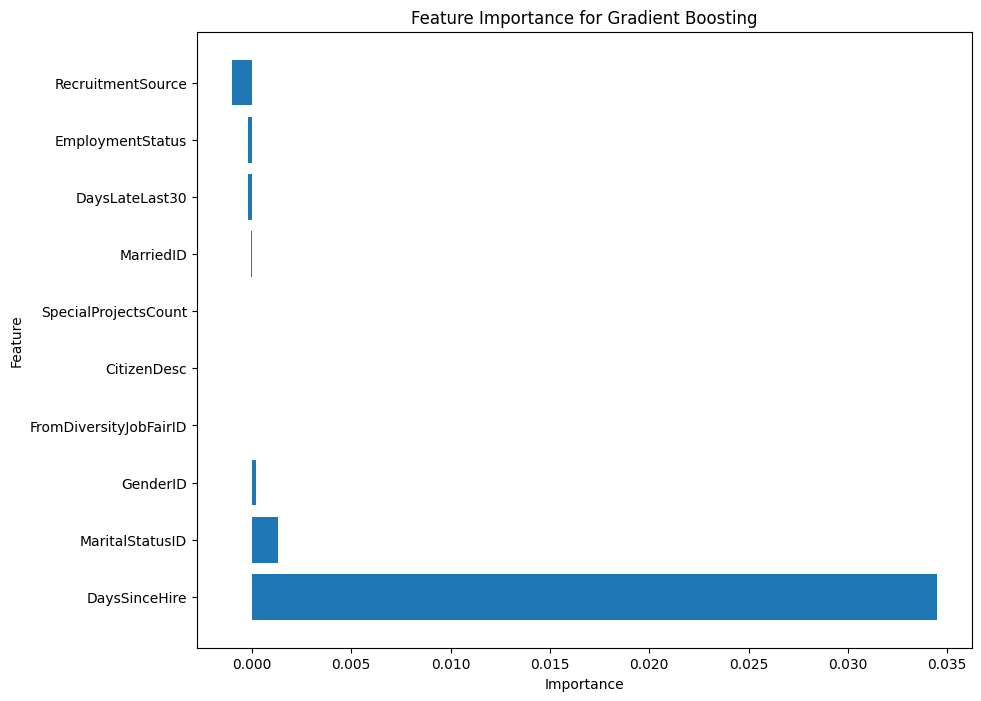

In [123]:
# top 10 features plots from top to bottom
plt.figure(figsize=(10, 8))
plt.barh(importances_df.index[:10], importances_df['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Gradient Boosting')
plt.show()

In [124]:
def get_evaluation_metrics(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    return  mae, r2, mse

metrics_lr = get_evaluation_metrics(lr, X_test_reg, y_test_reg)
metrics_rf = get_evaluation_metrics(best_model_rf,  X_test_reg, y_test_reg)
metrics_gb = get_evaluation_metrics(best_model_gb,  X_test_reg, y_test_reg)


metrics_df = pd.DataFrame([metrics_lr, metrics_rf, metrics_gb], 
                          columns=['MAE','R^2','MSE'], 
                          index=['Linear Regression', 'Random Forest', 'Gradient Boosting'])

metrics_df

MAE       R^2       MSE
Linear Regression  0.184105  0.183780  0.043669
Random Forest      0.177572  0.127967  0.046655
Gradient Boosting  0.180935  0.128473  0.046628

In [125]:
# convert to df
lr_predictions = pd.DataFrame(lr_predictions, columns=['Linear_Regression_Duration'])
rf_predictions = pd.DataFrame(rf_predictions, columns=['Random_Forest_Duration'])
gb_predictions = pd.DataFrame(gb_predictions, columns=['Gradient_Boosting_Duration'])

In [126]:
#reverse scaling with the min_duration and max_duration
def reverse_scaling(value, min_duration, max_duration):
    return value * (max_duration - min_duration) + min_duration

# for each row in the lr_predictions,rf_predictions and apply the reverse_scaling function
lr_predictions['Linear_Regression_Duration'] = lr_predictions['Linear_Regression_Duration'].apply(lambda x: reverse_scaling(x, min_duration, max_duration))
rf_predictions['Random_Forest_Duration'] = rf_predictions['Random_Forest_Duration'].apply(lambda x: reverse_scaling(x, min_duration, max_duration))
gb_predictions['Gradient_Boosting_Duration'] = gb_predictions['Gradient_Boosting_Duration'].apply(lambda x: reverse_scaling(x, min_duration, max_duration))

# put it in predictions_df
predictions_df = pd.concat([lr_predictions, rf_predictions, gb_predictions], axis=1)

# merge tge predictions with the DataForSectionD3
DataForSectionD3 = DataForSectionD3.join(predictions_df)

In [127]:
DataForSectionD3.dropna(inplace=True)

In [128]:
DataForSectionD3['Linear_Regression_Duration'] = pd.to_timedelta(DataForSectionD3['Linear_Regression_Duration'], unit='D')
DataForSectionD3['Random_Forest_Duration'] = pd.to_timedelta(DataForSectionD3['Random_Forest_Duration'], unit='D')
DataForSectionD3['Gradient_Boosting_Duration'] = pd.to_timedelta(DataForSectionD3['Gradient_Boosting_Duration'], unit='D')

DataForSectionD3['Linear_Regression_Duration'] = pd.to_timedelta(DataForSectionD3['Linear_Regression_Duration'].dt.days, unit='D')
DataForSectionD3['Random_Forest_Duration'] = pd.to_timedelta(DataForSectionD3['Random_Forest_Duration'].dt.days, unit='D')
DataForSectionD3['Gradient_Boosting_Duration'] = pd.to_timedelta(DataForSectionD3['Gradient_Boosting_Duration'].dt.days, unit='D')

DataForSectionD3['LR_Termination_Date'] = DataForSectionD3['LastPerformanceReview_Date'] + DataForSectionD3['Linear_Regression_Duration']
DataForSectionD3['RF_Termination_Date'] = DataForSectionD3['LastPerformanceReview_Date'] + DataForSectionD3['Random_Forest_Duration']
DataForSectionD3['GB_Termination_Date'] = DataForSectionD3['LastPerformanceReview_Date'] + DataForSectionD3['Gradient_Boosting_Duration']

DataForSectionD3['LR_Termination_Date'] = DataForSectionD3['LR_Termination_Date'].dt.date
DataForSectionD3['RF_Termination_Date'] = DataForSectionD3['RF_Termination_Date'].dt.date
DataForSectionD3['GB_Termination_Date'] = DataForSectionD3['GB_Termination_Date'].dt.date

DataForSectionD3

DateofTermination  DaysUntilTermination LastPerformanceReview_Date   
1         2016-06-16                   113                 2016-02-24  \
2         2012-09-24                   132                 2012-05-15   
4         2016-09-06                   218                 2016-02-01   
10        2017-01-12                   348                 2016-01-30   
11        2016-09-19                   136                 2016-05-06   
14        2017-04-06                    35                 2017-03-02   
15        2017-08-04                   121                 2017-04-05   
18        2015-09-12                   240                 2015-01-15   

   Linear_Regression_Duration Random_Forest_Duration   
1                    152 days               144 days  \
2                    180 days               177 days   
4                    149 days               200 days   
10                   178 days               126 days   
11                   151 days               185 days   
14                   233 days               241 days   
15                   222 days               197 days   
18                   653 days               505 days   

   Gradient_Boosting_Duration LR_Termination_Date RF_Termination_Date   
1                    168 days          2016-07-25          2016-07-17  \
2                    201 days          2012-11-11          2012-11-08   
4                    186 days          2016-06-29          2016-08-19   
10                   158 days          2016-07-26          2016-06-04   
11                   173 days          2016-10-04          2016-11-07   
14                   184 days          2017-10-21          2017-10-29   
15                   184 days          2017-11-13          2017-10-19   
18                   416 days          2016-10-29          2016-06-03   

   GB_Termination_Date  
1           2016-08-10  
2           2012-12-02  
4           2016-08-05  
10          2016-07-06  
11          2016-10-26  
14          2017-09-02  
15          2017-10-06  
18          2016-03-06

In [129]:
DataForSectionD3 = DataForSectionD3.rename(columns={'DateofTermination': 'Actual_Termination_Date'})
DataForSectionD3 = DataForSectionD3.rename(columns={'DaysUntilTermination': 'Actual_Duration'})
DataForSectionD3 = DataForSectionD3.drop(['LastPerformanceReview_Date', 'Linear_Regression_Duration', 'Random_Forest_Duration', 'Gradient_Boosting_Duration'], axis=1)

### <span style="color:lightblue"> Final dataframe for Section D</span>

In [130]:
DataForSectionD3

Actual_Termination_Date  Actual_Duration LR_Termination_Date   
1               2016-06-16              113          2016-07-25  \
2               2012-09-24              132          2012-11-11   
4               2016-09-06              218          2016-06-29   
10              2017-01-12              348          2016-07-26   
11              2016-09-19              136          2016-10-04   
14              2017-04-06               35          2017-10-21   
15              2017-08-04              121          2017-11-13   
18              2015-09-12              240          2016-10-29   

   RF_Termination_Date GB_Termination_Date  
1           2016-07-17          2016-08-10  
2           2012-11-08          2012-12-02  
4           2016-08-19          2016-08-05  
10          2016-06-04          2016-07-06  
11          2016-11-07          2016-10-26  
14          2017-10-29          2017-09-02  
15          2017-10-19          2017-10-06  
18          2016-06-03          2016-03-06

In [131]:
del DataForSectionD3
del df

# Section E Bonus

In [132]:
sectionE_df = df_SectionE.copy()
sectionE_df

Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID   
1    Ait Sidi, Karthikeyan     10084          1                1         1  \
2           Akinkuolie, Sarah  10196          1                1         0   
3                Alagbe,Trina  10088          1                1         0   
4            Anderson, Carol   10069          0                2         0   
5           Anderson, Linda    10002          0                0         0   
..                        ...    ...        ...              ...       ...   
306            Woodson, Jason  10135          0                0         1   
307        Ybarra, Catherine   10301          0                0         0   
308          Zamora, Jennifer  10010          0                0         0   
309               Zhou, Julia  10043          0                0         0   
310             Zima, Colleen  10271          0                4         0   

     EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...   
1              5       3            3                       0  104437  ...  \
2              5       5            3                       0   64955  ...   
3              1       5            3                       0   64991  ...   
4              5       5            3                       0   50825  ...   
5              1       5            4                       0   57568  ...   
..           ...     ...          ...                     ...     ...  ...   
306            1       5            3                       0   65893  ...   
307            5       5            1                       0   48513  ...   
308            1       3            4                       0  220450  ...   
309            1       3            3                       0   89292  ...   
310            1       5            3                       0   45046  ...   

        ManagerName  ManagerID  RecruitmentSource PerformanceScore   
1        Simon Roup        4.0             Indeed      Fully Meets  \
2    Kissy Sullivan       20.0           LinkedIn      Fully Meets   
3      Elijiah Gray       16.0             Indeed      Fully Meets   
4    Webster Butler       39.0      Google Search      Fully Meets   
5          Amy Dunn       11.0           LinkedIn          Exceeds   
..              ...        ...                ...              ...   
306  Kissy Sullivan       20.0           LinkedIn      Fully Meets   
307  Brannon Miller       12.0      Google Search              PIP   
308      Janet King        2.0  Employee Referral          Exceeds   
309      Simon Roup        4.0  Employee Referral      Fully Meets   
310   David Stanley       14.0           LinkedIn      Fully Meets   

     EngagementSurvey EmpSatisfaction SpecialProjectsCount   
1                4.96               3                    6  \
2                3.02               3                    0   
3                4.84               5                    0   
4                5.00               4                    0   
5                5.00               5                    0   
..                ...             ...                  ...   
306              4.07               4                    0   
307              3.20               2                    0   
308              4.60               5                    6   
309              5.00               3                    5   
310              4.50               5                    0   

    LastPerformanceReview_Date DaysLateLast30 Absences  
1                   2016-02-24              0       17  
2                   2012-05-15              0        3  
3                   2019-01-03              0       15  
4                   2016-02-01              0        2  
5                   2019-01-07              0       15  
..                         ...            ...      ...  
306                 2019-02-28              0       13  
307                 2015-09-02              5        4  
308                 2019-02-21             

In [133]:
sectionE_df['DateofHire'] = pd.to_datetime(sectionE_df['DateofHire'])
sectionE_df['DateofTermination'] = pd.to_datetime(sectionE_df['DateofTermination'])
sectionE_df['HireYear'] = sectionE_df['DateofHire'].dt.year
sectionE_df['TerminationYear'] = sectionE_df['DateofTermination'].dt.year

retention_rate = []
years = range(2008, 2018)
for year in years:
    start_of_year = pd.to_datetime(f"{year}-01-01")
    end_of_year = pd.to_datetime(f"{year}-12-31")
    total_employees = len(sectionE_df[sectionE_df['DateofHire'] <= start_of_year])
    retained_employees = len(sectionE_df[(sectionE_df['DateofHire'] <= start_of_year) & ((sectionE_df['DateofTermination'] > end_of_year))])
    retention_rate.append((retained_employees / total_employees) * 100)

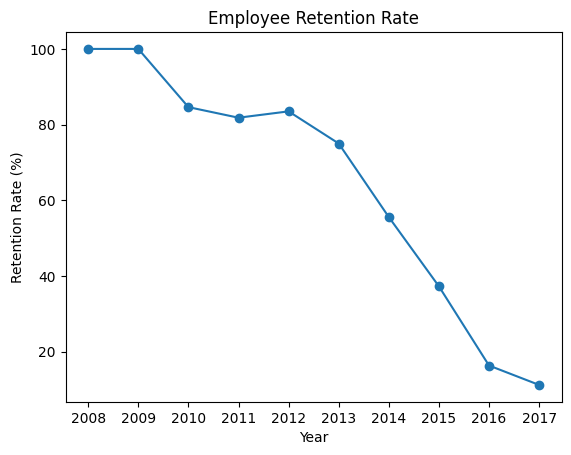

In [134]:
plt.plot(years, retention_rate, marker='o')
plt.xlabel('Year')
plt.ylabel('Retention Rate (%)')
plt.title('Employee Retention Rate')
plt.xticks(years)
plt.show()

In [135]:
# one hot encoding for the department column
sectionE_df = pd.get_dummies(sectionE_df, columns=['Department'], drop_first=True)
# save the new columns names in a list
department_columns = sectionE_df.columns[-4:].tolist()

In [136]:
now = datetime.now()
sectionE_df['Age'] = (now - sectionE_df['DOB']).dt.days // 365

In [137]:
diversity_index = []
for department in department_columns:
    data = sectionE_df[sectionE_df[department] == 1]
    num_employees = len(data)
    
    race_counts = data['RaceDesc'].value_counts()
    race_probs = race_counts / num_employees
    race_entropy = -(race_probs * np.log2(race_probs)).sum()
    
    gender_counts = data['GenderID'].value_counts()
    gender_probs = gender_counts / num_employees
    gender_entropy = -(gender_probs * np.log2(gender_probs)).sum()
    
    age_counts = data['Age'].value_counts()
    age_probs = age_counts / num_employees
    age_entropy = -(age_probs * np.log2(age_probs)).sum()
    
    diversity = (race_entropy + gender_entropy + age_entropy) / 3
    diversity_index.append((department, diversity))

diversity_index.sort(key=lambda x: x[1], reverse=True)
departments = [item[0] for item in diversity_index]
diversity_values = [item[1] for item in diversity_index]

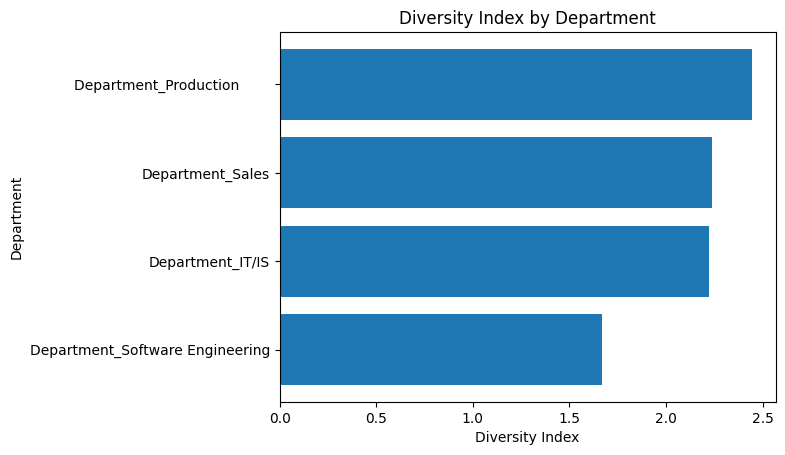

In [138]:
plt.barh(range(len(departments)), diversity_values, align='center')
plt.yticks(range(len(departments)), departments)
plt.xlabel('Diversity Index')
plt.ylabel('Department')
plt.title('Diversity Index by Department')
plt.gca().invert_yaxis()
plt.show()

In [139]:
state_employees = sectionE_df['State'].value_counts().reset_index()
state_employees.columns = ['State', 'Number of Employees']

fig = px.choropleth(state_employees,
                    locations='State',
                    locationmode='USA-states',
                    scope='usa',
                    color='Number of Employees',
                    color_continuous_scale='Viridis_r',
                    title='Number of Employees by State',
                    labels={'Number of Employees': 'Number of Employees'},
                    )

fig.update_geos(showsubunits=True, subunitcolor='gray')

fig.show()


In [140]:
del df_SectionE
del sectionE_df